#Introduction

Maternal health is a critical area of focus in public health, as complications during pregnancy can have significant consequences for both the mother and child. The dataset analyzed in this study, *Maternal Health Risk Data*, contains 1,014 rows and seven columns, offering a detailed view of factors associated with pregnancy risks. The target variable, **RiskLevel**, categorizes pregnancies into low, medium, and high risk levels, providing a foundation for predicting and addressing potential health complications.  

My analysis seeks to answer key questions of how the  maternal health indicators, such as age, blood pressure, blood sugar levels, body temperature, and heart rate, contribute most significantly to the different risk levels.

Age(Integer): Any ages in years of the women during pregnancy

SystolicBP(Integer): The upper value of Blood Pressure in mmHG of the women during pregnancy

DiastolicBP(Integer): The lower value of Blood Pressure in mmHG of the the women during pregnancynt

BS, Blood Sugar(Integer): The blood glucose levels of the women during pregnancy

BodyTemp(Integer): The body temperature of the women during pregnancy

HeartRate(Integer): The bpm and heart rate of the women during pregnancy

RiskLevel(Categorical): The target variable that predicts the risk intensity level during pregnancy considering all of the other feature variables

My study begins with data preparation and visualization, ensuring the dataset is clean and ready for analysis, such as checking for null/missing values. There were no missing or null values I then explore relationships between variables to uncover patterns, trends, and distributions associated with different risk levels. I then built multiple classification models to find the best models based on their accuracies and then compared the biases. Finally, I conclude my key findings, discussing their implications for improving maternal healthcare and informing policy decisions.  

By investigating the critical factors contributing to pregnancy risks, my study aims to provide actionable insights that enhance maternal health outcomes and reduce the incidence of complications during pregnancy.

#Exploratory Analysis

In [1]:
import io
from google.colab import files
from sklearn import tree
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.model_selection import cross_val_score, KFold,train_test_split

from sklearn.metrics import accuracy_score


In [2]:
uploaded = files.upload()

Saving maternalRisk.csv to maternalRisk.csv


In [3]:
uploaded = io.BytesIO(uploaded['maternalRisk.csv'])

In [4]:
import pandas as pd
df = pd.read_csv(uploaded)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape

(1014, 7)

1014 rows and 7 columns

In [ ]:
df.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


Most of the variables are numerical except for the target variable, 'RiskLevel', which is categorical

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Count is the number of non-null values in each column

Mean is the average value of each column

STD is the standard deviation, which is measuring the spread of the data

Min is the minimum value in each column

25% representing the value below which 25% of the data falls

50% is also the median and value below which 50% of the data falls

75% represents the value below which 75% of the data falls

Max is the maximum value in each column

In [220]:
#Checking for null values
df.isnull().sum().sort_values()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


There are no missing or null values in the dataset

In [221]:


# Calculate the percentage of unique values for the 'RiskLevel' column
risk_level_counts = df['RiskLevel'].value_counts(normalize=True) * 100
risk_level_counts

,proportion
RiskLevel,
low risk,40.039448
mid risk,33.136095
high risk,26.824458


This is the percentage for the unqiue values for each level in the target column

In [ ]:
df.describe().count()

,0
Age,8
SystolicBP,8
DiastolicBP,8
BS,8
BodyTemp,8
HeartRate,8


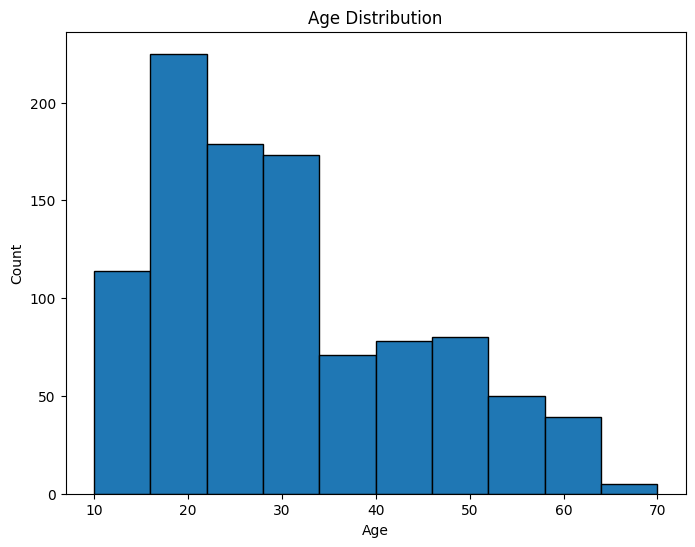

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

 Age:
  - Normally distributed with a slight skew towards the younger ages.
  - Most of the women are between 20 and 35 years old.
  -The age distribution of pregnant women in the dataset shows a relatively even spread across different age groups.  The histogram peaks between the ages of 20 and 30, suggesting that a significant portion of the pregnant women fall within this age range.  However, there are also notable numbers of women in their late teens and early forties, indicating a broader age range of pregnancies represented in the data.

<ipython-input-210-03268166b602>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


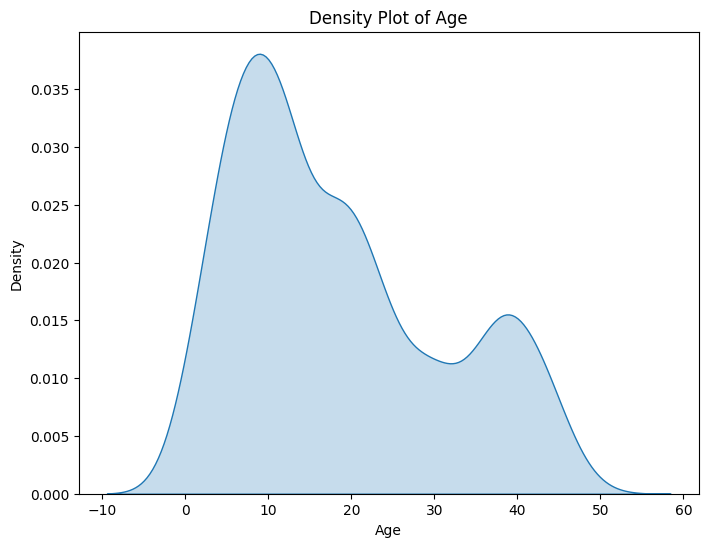

In [210]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age')
plt.show()

The density plot of age illustrates the distribution of maternal ages in the dataset. The plot has a concave points mean. It provides a smooth, continuous representation of the age distribution, highlighting areas of higher and lower concentration of ages.  The peak of the density curve indicates the most frequent age range among pregnant women in the dataset, while the tails of the curve show the proportions of younger and older mothers. This visualization complements the histogram by showcasing the probability density of age rather than just the frequency counts within bins.


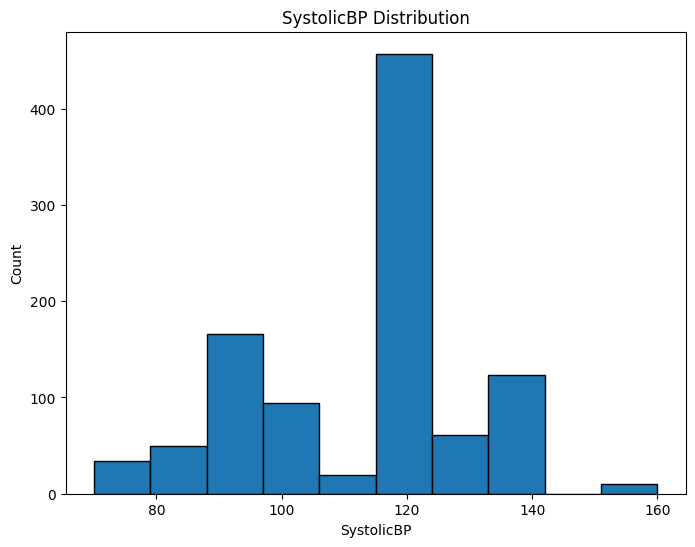

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['SystolicBP'], bins=10, edgecolor='black')
plt.xlabel('SystolicBP')
plt.ylabel('Count')
plt.title('SystolicBP Distribution')
plt.show()

SystolicBP:
  - Roughly normally distributed with a possible slight skew.
  - Majority of the values seem to be between 80 and 130.

<ipython-input-211-69daa28166b5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SystolicBP'], shade=True)


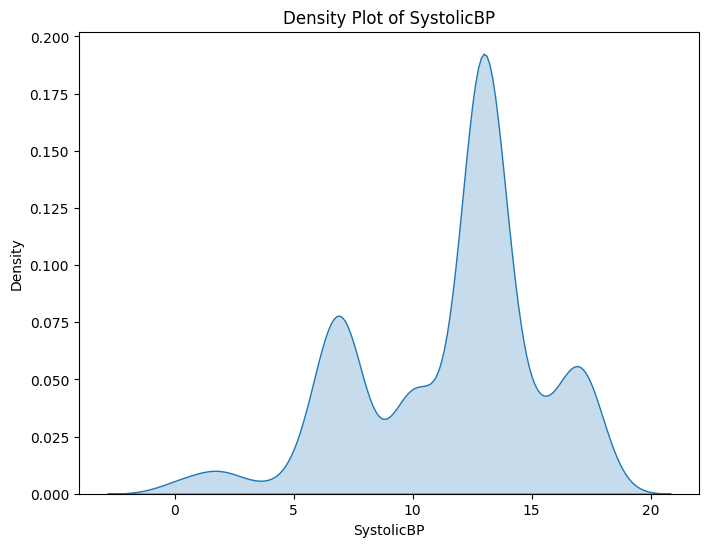

In [211]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SystolicBP'], shade=True)
plt.xlabel('SystolicBP')
plt.ylabel('Density')
plt.title('Density Plot of SystolicBP')
plt.show()

The density plot of systolic blood pressure (SystolicBP) illustrates the distribution of systolic blood pressure measurements among pregnant women. This is a concave points mean plot. It provides a smooth, continuous representation of the data, showing the concentration of measurements across different pressure levels. The peak of the density curve indicates the most frequent systolic blood pressure range in the dataset, while the tails reveal the proportion of measurements at higher and lower pressure levels.  This visualization complements the histogram by displaying the probability density of systolic blood pressure, offering a more detailed view of the data's distribution compared to simple frequency counts.


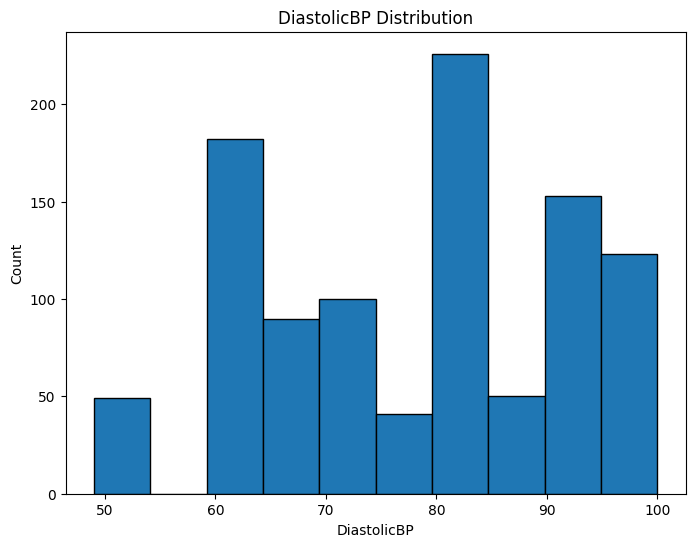

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['DiastolicBP'], bins=10, edgecolor='black')
plt.xlabel('DiastolicBP')
plt.ylabel('Count')
plt.title('DiastolicBP Distribution')
plt.show()

DiastolicBP:
- Appears to be  normally distributed, but with some potential outliers.
- Most values fall within the range of 60 to 90.
- A few unusually high or low readings

<ipython-input-212-e152da7c4042>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['DiastolicBP'], shade=True)


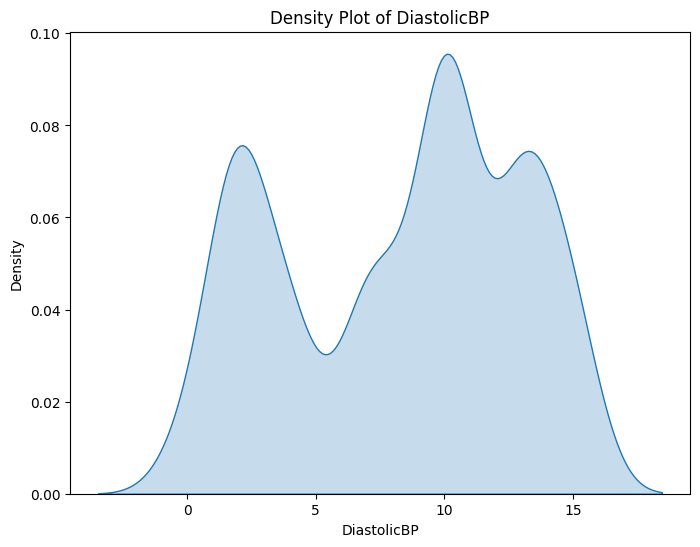

In [212]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df['DiastolicBP'], shade=True)
plt.xlabel('DiastolicBP')
plt.ylabel('Density')
plt.title('Density Plot of DiastolicBP')
plt.show()


The density plot of diastolic blood pressure (DiastolicBP) shows the distribution of diastolic blood pressure measurements among pregnant women.  The plot has a concave points mean. It presents a smooth, continuous representation, highlighting the concentration of measurements across different pressure levels. The peak of the density curve indicates the most frequent diastolic blood pressure range in the dataset. The tails of the curve show the proportion of measurements at higher and lower pressure levels, providing insights into the spread of the data.  This visualization complements the histogram by illustrating the probability density of diastolic blood pressure, offering a more nuanced view of the data's distribution compared to simple frequency counts within bins.  It allows for a better understanding of the underlying distribution and the relative likelihood of observing specific diastolic blood pressure values within the dataset.


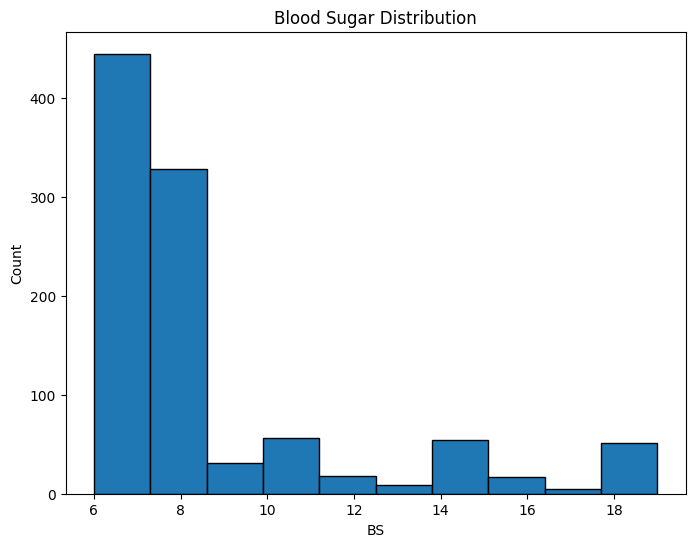

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['BS'], bins=10, edgecolor='black')
plt.xlabel('BS')
plt.ylabel('Count')
plt.title('Blood Sugar Distribution')
plt.show()

BS:
  - Seems to be skewed to the lower values and might have a positive skew.
  - The majority of values seem to be between 70 and 90.

<ipython-input-213-44a5f9e6c9ae>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BS'], shade=True)


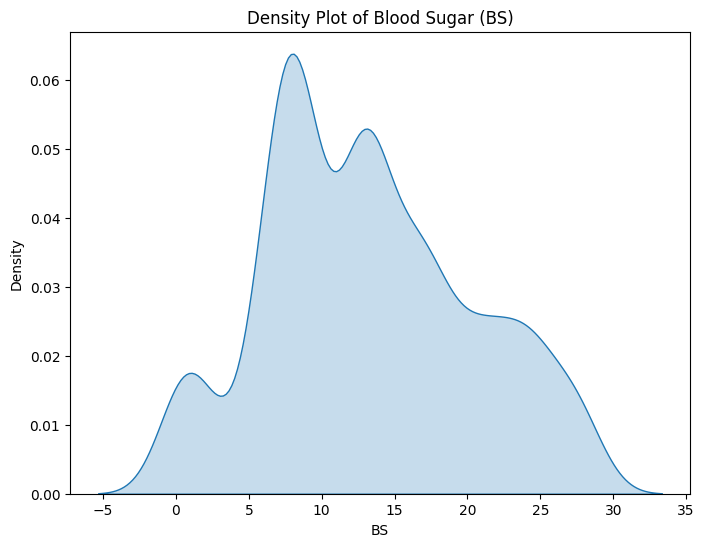

In [213]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['BS'], shade=True)
plt.xlabel('BS')
plt.ylabel('Density')
plt.title('Density Plot of Blood Sugar (BS)')
plt.show()


The density plot of blood sugar (BS) levels visualizes the distribution of blood glucose measurements among pregnant women.  The plot has a compactness mean. The plot exhibits a slight rightward skew, indicating a concentration of lower blood sugar values with a tapering tail towards higher values.  The peak of the density curve suggests the most frequent blood sugar range within the dataset.  This visualization provides a continuous representation of the data, offering insights into the probability density of observing particular blood sugar levels in the population of pregnant women.  The rightward skew might warrant further investigation into potential underlying factors contributing to this pattern.


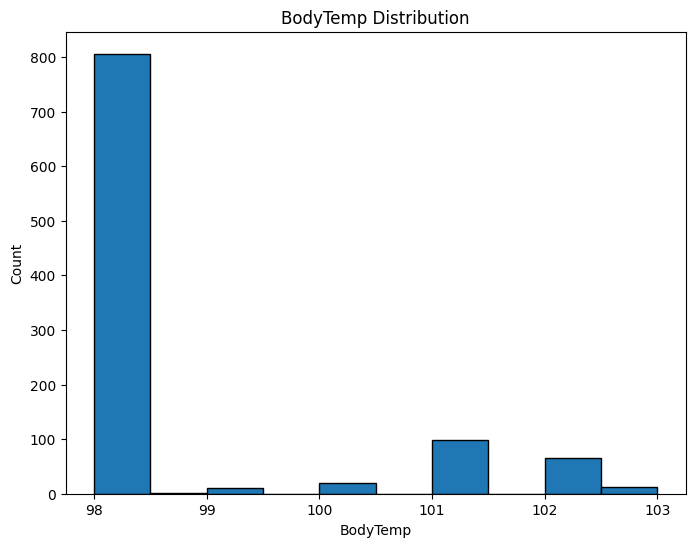

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['BodyTemp'], bins=10, edgecolor='black')
plt.xlabel('BodyTemp')
plt.ylabel('Count')
plt.title('BodyTemp Distribution')
plt.show()

The body temperature histogram displays the distribution of body temperatures among pregnant women.  The majority of the temperatures appear to cluster around a specific range, suggesting a relatively normal distribution with minimal variation and multi-modal. Visually, the distribution appears fairly concentrated, indicating that most women have temperatures within a narrow, healthy range.


<ipython-input-214-9e157b435a24>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BodyTemp'], shade=True)


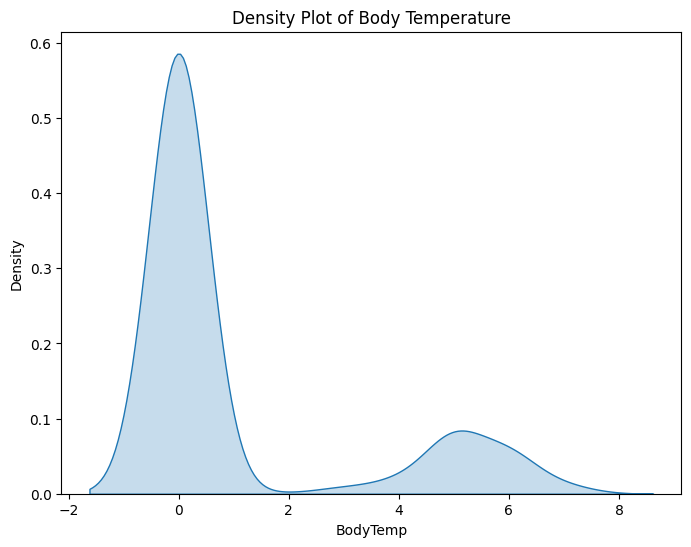

In [214]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df['BodyTemp'], shade=True)
plt.xlabel('BodyTemp')
plt.ylabel('Density')
plt.title('Density Plot of Body Temperature')
plt.show()


The density plot of body temperature provides a smooth representation of the temperature distribution. The plot has an area mean.
 It confirms the observation from the histogram that the majority of the body temperatures are concentrated within a relatively narrow range, suggesting a normal distribution with minimal variations.  The peak of the density curve highlights the most frequent body temperature among the pregnant women in the dataset.  The plot's smoothness allows for a more detailed visualization of the distribution's shape and potential subtle deviations from a perfectly normal distribution.  Any significant tails or secondary peaks could indicate underlying patterns or factors influencing body temperature variations among the study participants.

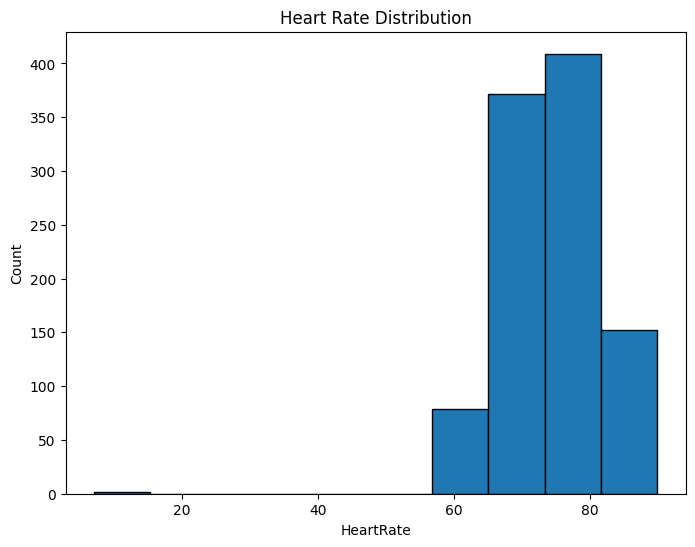

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['HeartRate'], bins=10, edgecolor='black')
plt.xlabel('HeartRate')
plt.ylabel('Count')
plt.title('Heart Rate Distribution')
plt.show()

HeartRate:
  - Distribution appears to be skewed and concentrated around the normal heart rate range for teens and adults which is 60-100 BPM

<ipython-input-215-22832e009532>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['HeartRate'], shade=True)


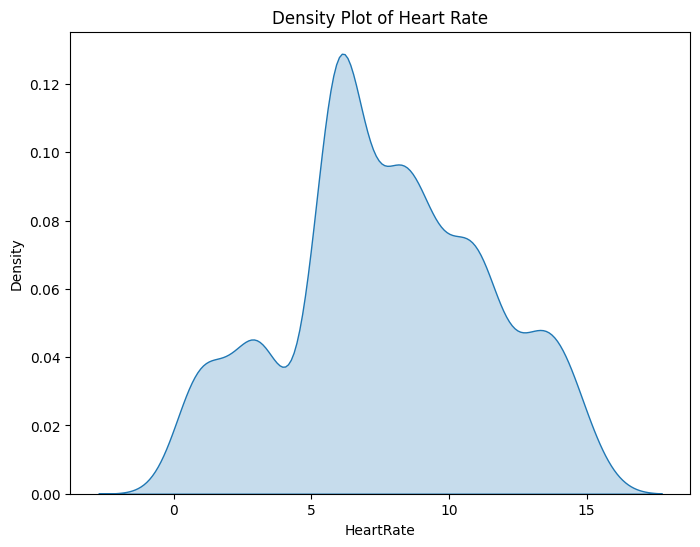

In [215]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df['HeartRate'], shade=True)
plt.xlabel('HeartRate')
plt.ylabel('Density')
plt.title('Density Plot of Heart Rate')
plt.show()


The density plot of heart rate illustrates the distribution of heart rate measurements among pregnant women. The plot has a perimeter mean. The plot shows a concentration of heart rates within a specific range, suggesting a generally normal distribution.  The peak of the density curve indicates the most frequent heart rate among the pregnant women.  The plot's smoothness allows for a more detailed visualization of the distribution's shape and any deviations from a perfectly normal distribution.  The presence of any significant tails or secondary peaks could indicate underlying patterns or factors influencing heart rate variations.  This visualization complements the histogram by providing a continuous representation of the data, enhancing the understanding of the heart rate distribution among pregnant women.


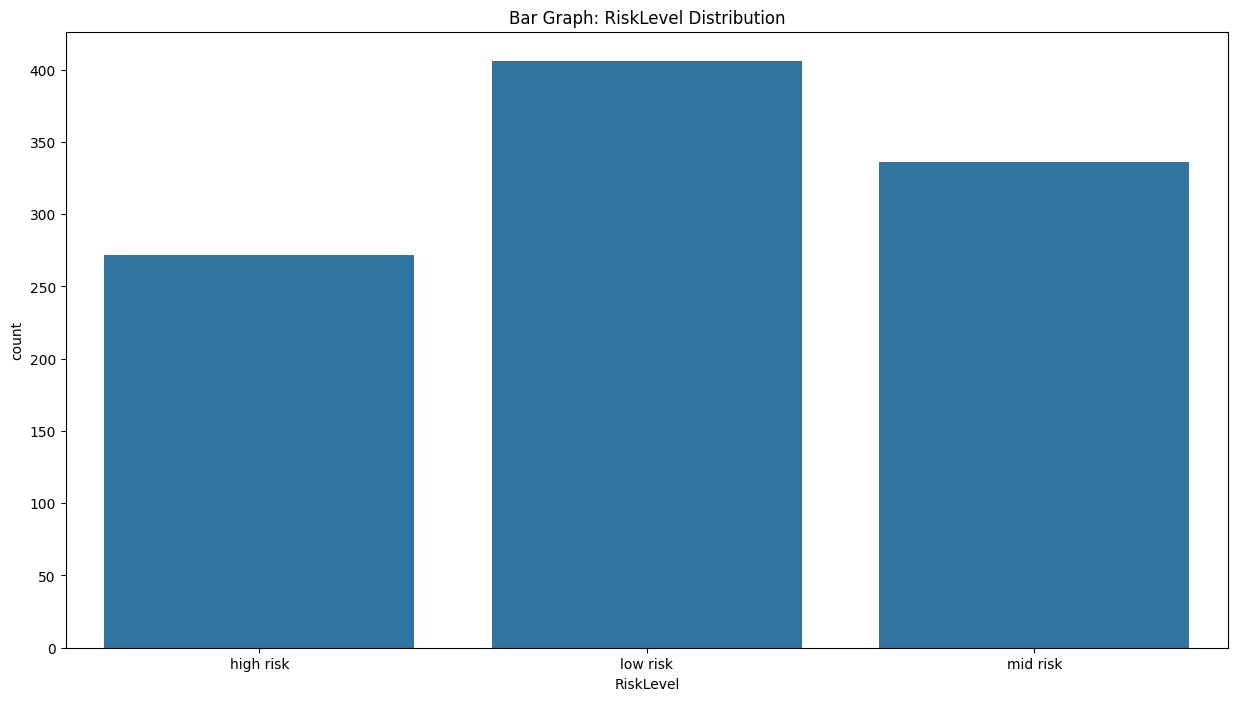

In [6]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', data=df)
plt.title('Bar Graph: RiskLevel Distribution')
plt.show()

RiskLevel:
  - This histogram should show the frequency of different risk levels (high, low, medium)
  - It indicates the proportion of women in each risk category, which is essential to understand the overall risk distribution.

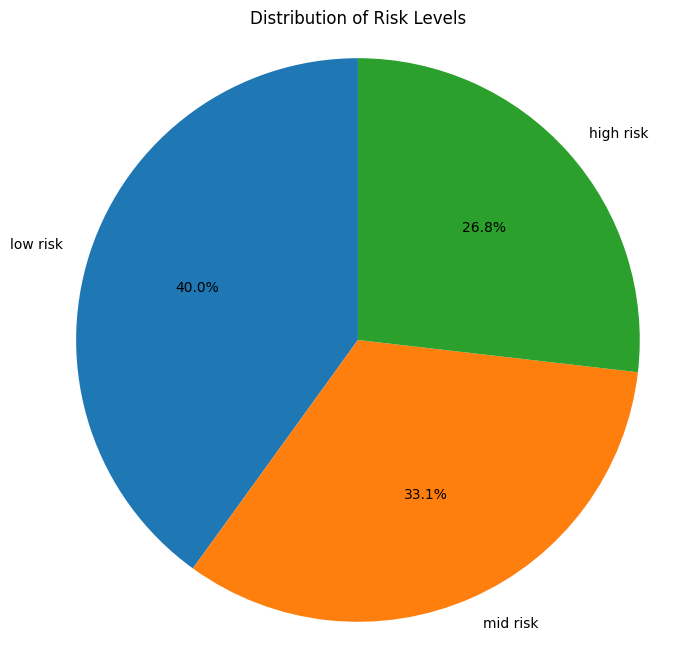

In [217]:

# Calculate the proportions for the pie chart
risk_counts = df['RiskLevel'].value_counts()
risk_proportions = risk_counts / risk_counts.sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_proportions, labels=risk_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk Levels')
plt.axis('equal')
plt.show()


This pie chart visualizes the proportion of pregnant women categorized into different risk levels: low, medium, and high. Each slice represents a risk level, with its size corresponding to the percentage of women in that category.
- low risk: 40.0% of the total population.
- mid risk: 33.1% of the total population.
- high risk: 26.8% of the total population.

The chart provides a quick overview of the risk distribution within the dataset, allowing for easy comparison of the relative frequencies of each risk category.

In [13]:
df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


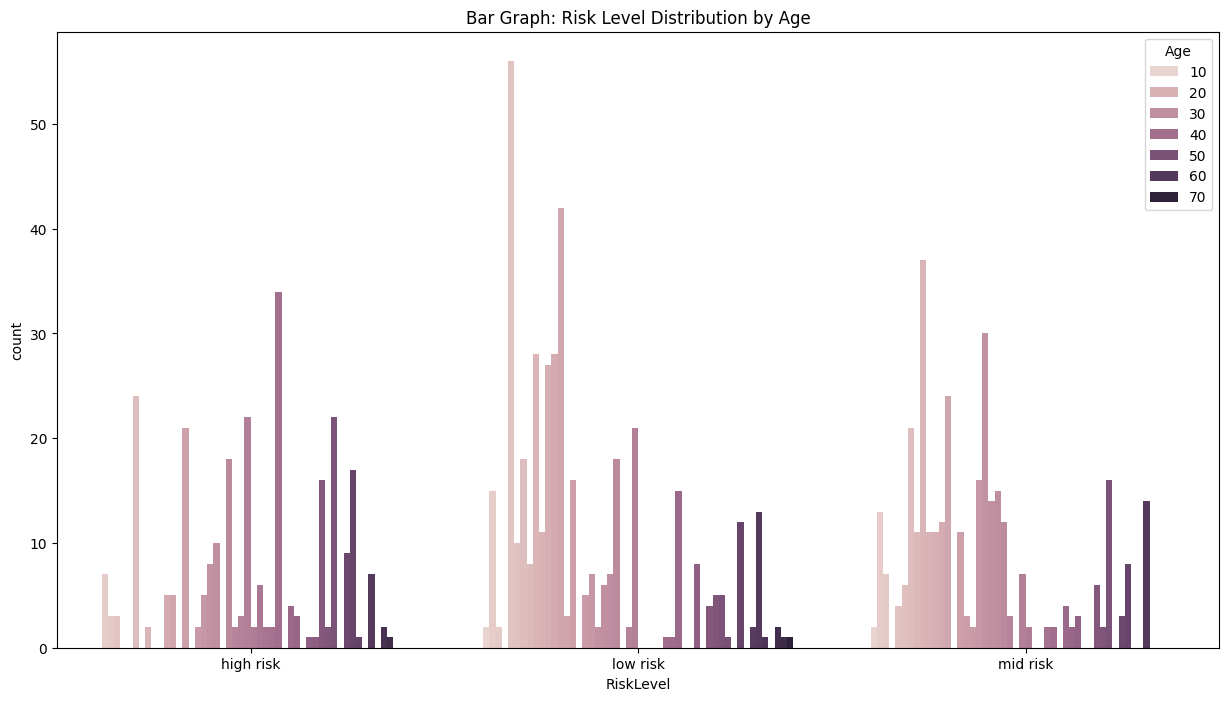

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='Age', data=df)
plt.title('Bar Graph: Risk Level Distribution by Age')
plt.show()

This graph is demonstrating which age groups have a higher prevelance of low, medium, or high-risk levels

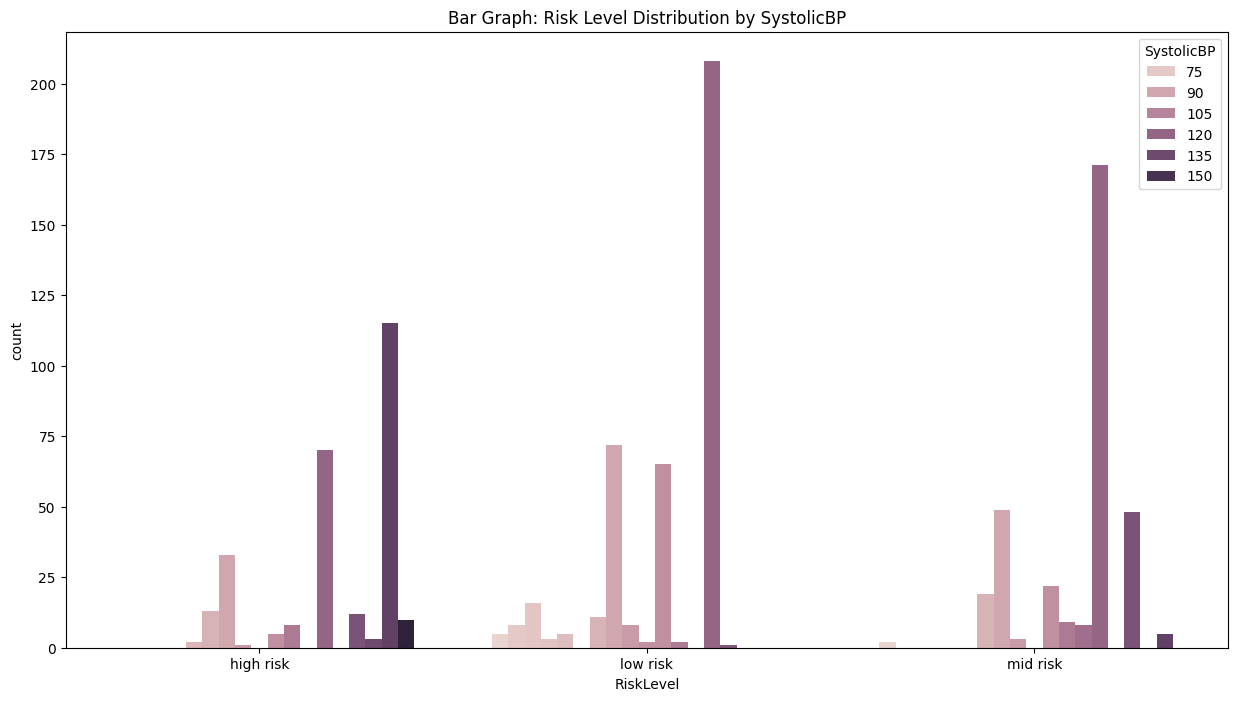

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='SystolicBP', data=df)
plt.title('Bar Graph: Risk Level Distribution by SystolicBP')
plt.show()

Representing the relationship that the SystolicBP and the pregnancy risk levles have; which SystolicBP values are more frequently associated with a particular risk level.

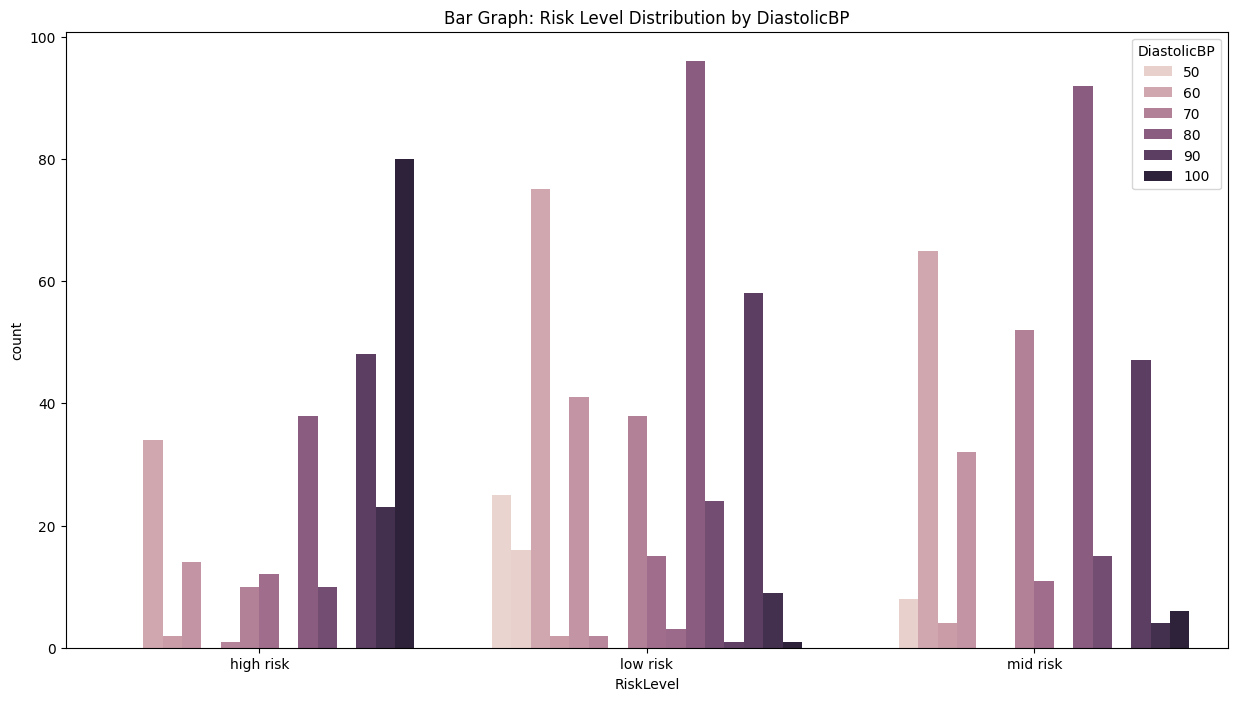

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='DiastolicBP', data=df)
plt.title('Bar Graph: Risk Level Distribution by DiastolicBP')
plt.show()

Representing the different levles of DiastolicBP that are associated with low, medium, or high pregnancy risk.

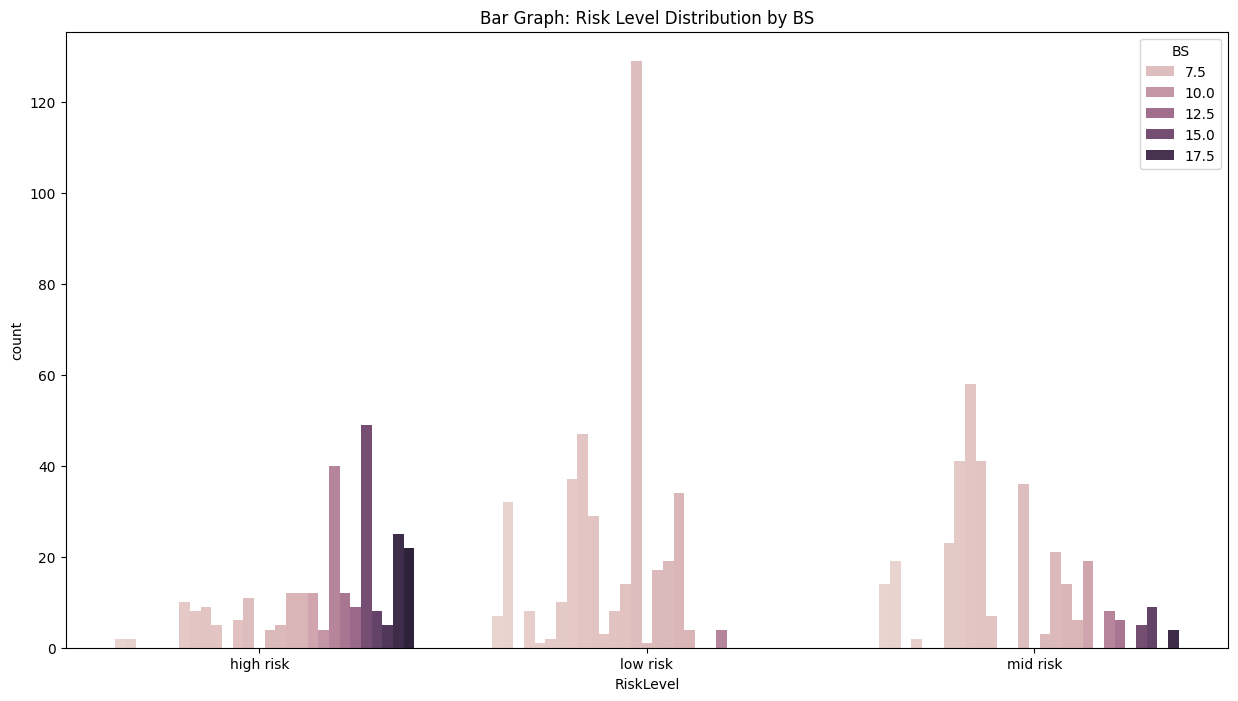

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='BS', data=df)
plt.title('Bar Graph: Risk Level Distribution by BS')
plt.show()

Representing the blood sugar levles within each risk category

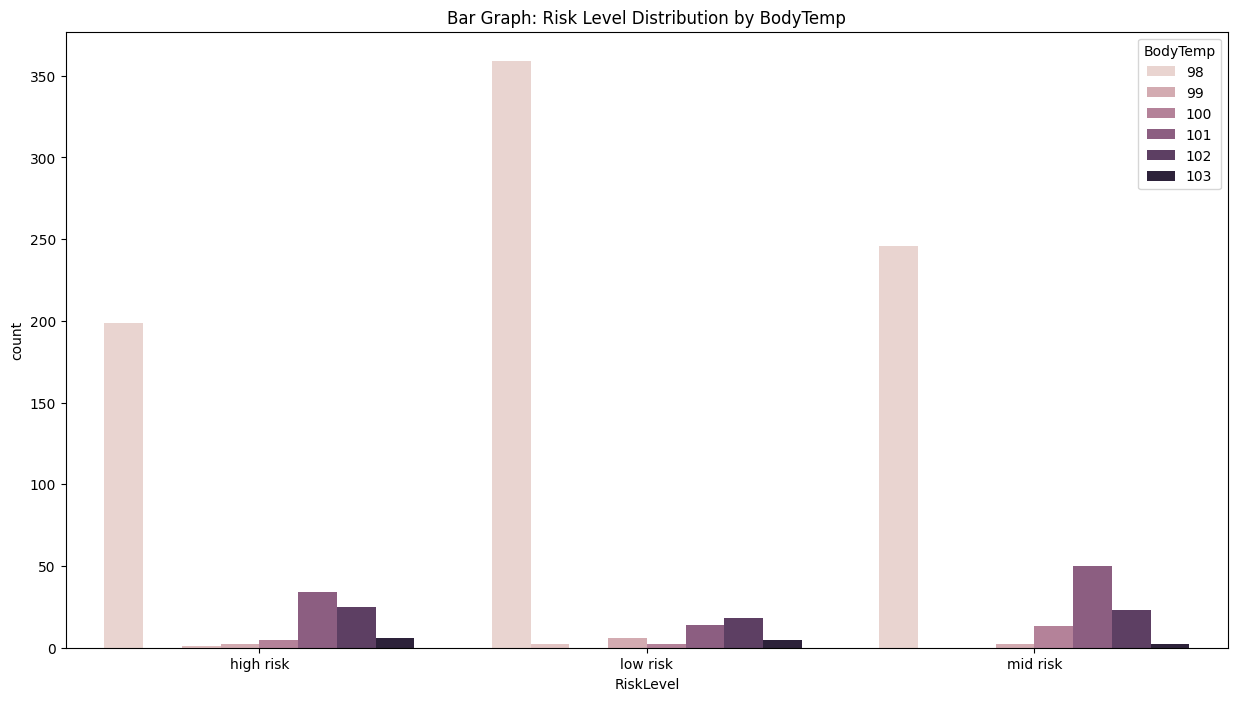

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='BodyTemp', data=df)
plt.title('Bar Graph: Risk Level Distribution by BodyTemp')
plt.show()

Representing how many women with a specific body temperature fall into each risk levl category

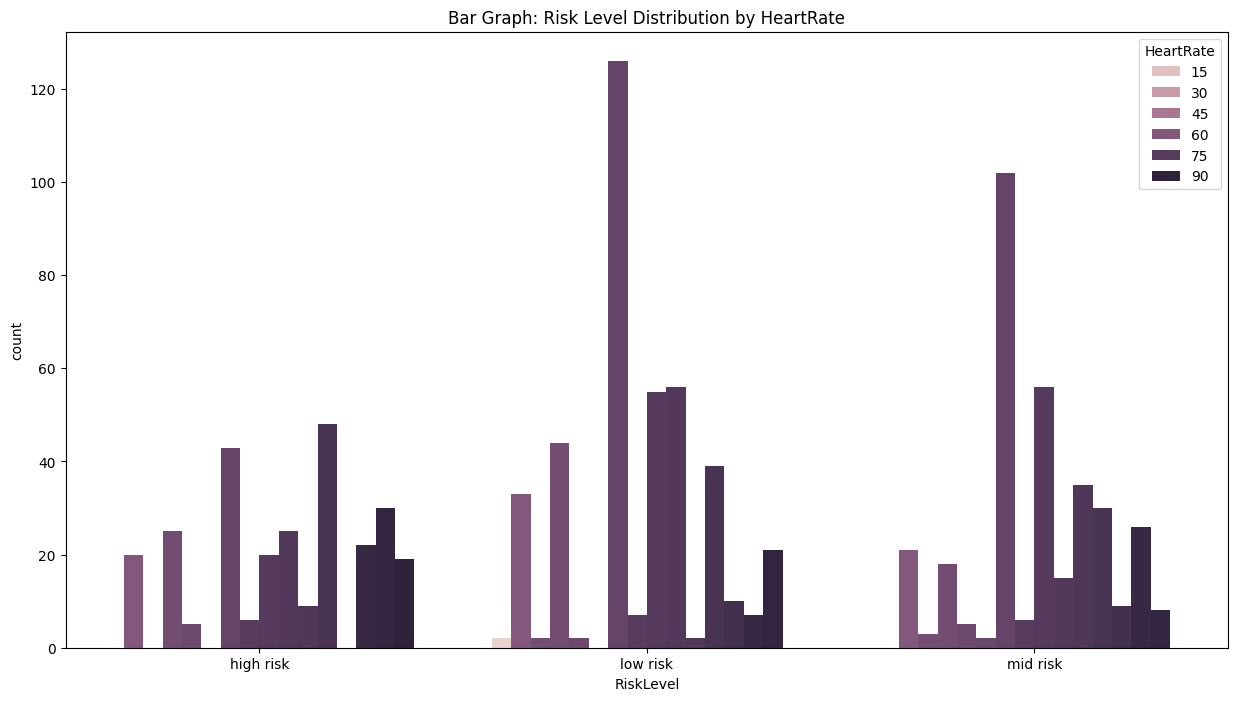

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='HeartRate', data=df)
plt.title('Bar Graph: Risk Level Distribution by HeartRate')
plt.show()

Representing which heart rate ranges are commonly associated with each risk level

In [16]:
#Counting how manying unique values are in the target column
uniqueCount = df['RiskLevel'].value_counts()
print(uniqueCount)

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [17]:
#Calculation of the percentage of unique values in the target column
uniquePercentage = uniqueCount /len(df) * 100
print(uniquePercentage)

RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: count, dtype: float64


This is showing that the data is imbalanced.

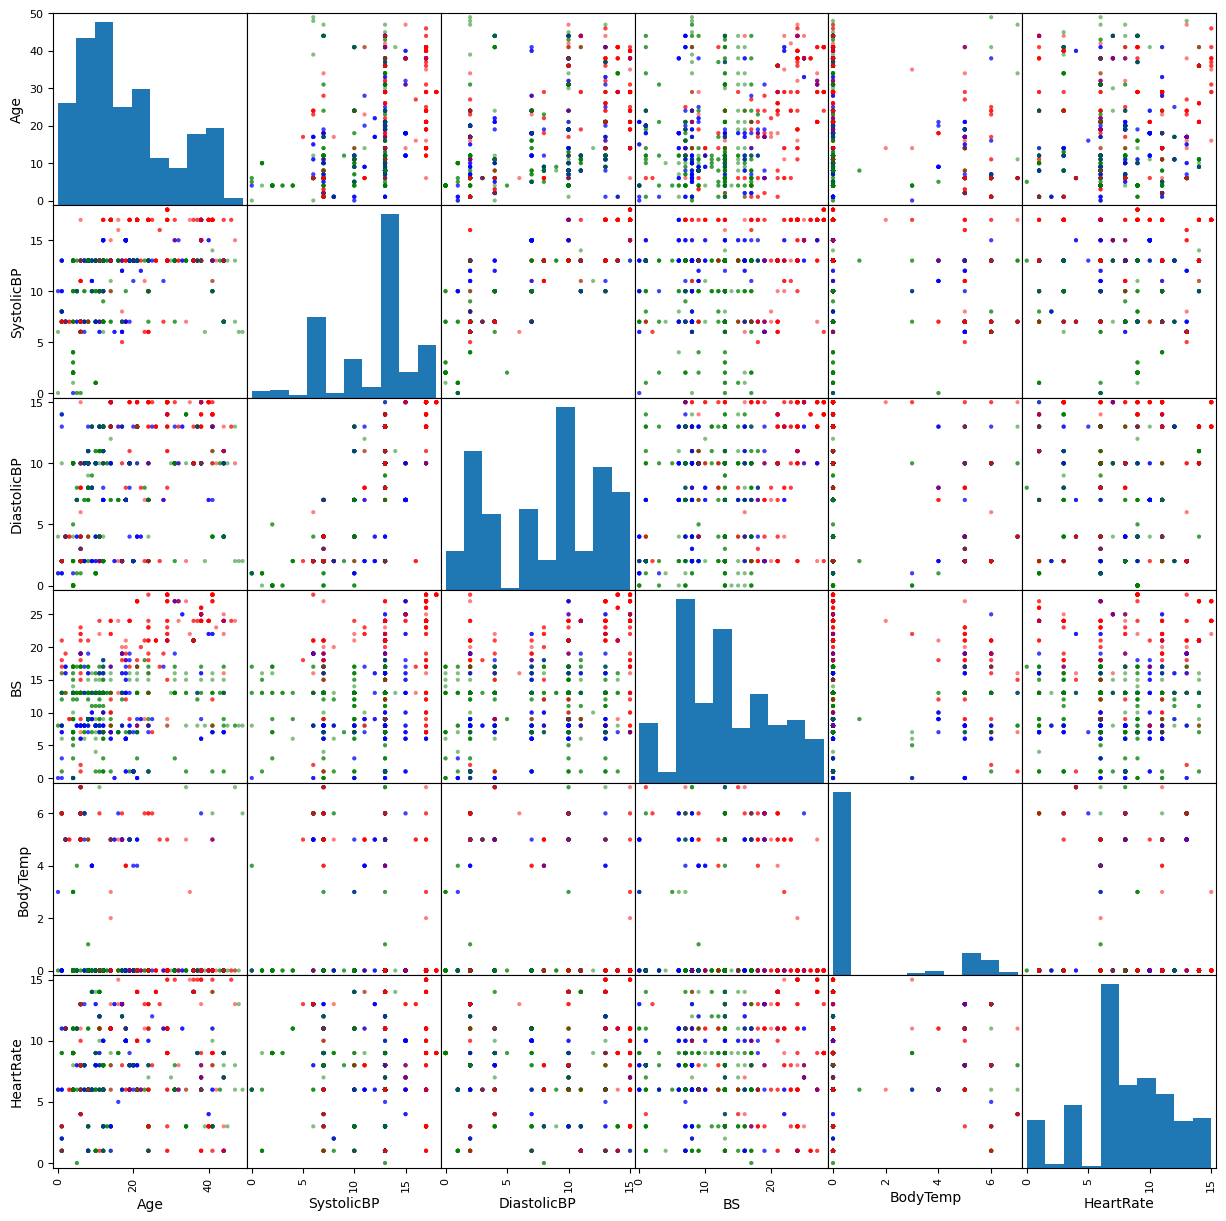

In [222]:
def fn_color(x):
  if x == 'high risk':
    return 'red'
  elif x == 'mid risk':
    return 'blue'
  else: # versicolor
    return 'green'

# compute a color vector
color_vector = df['RiskLevel'].map(fn_color)

# use the color vector in the plot
null = pd.plotting.scatter_matrix(df, figsize=[15,15],c=color_vector)

The scatter matrix provides a pairwise visualization of the relationships between the numerical features in the dataset: Age, SystolicBP (Systolic Blood Pressure), DiastolicBP (Diastolic Blood Pressure), Blood Sugar (BS), BodyTemp (Body Temperature), and HeartRate. Each scatter plot represents how one variable correlates with another across the dataset, with the points color-coded based on the target variable, RiskLevel (low, medium, or high).

Key Observations:
Clusters of Low Risk Levels:

A strong concentration of low-risk points is observed in the scatter plots, particularly where values of Age and BS (Blood Sugar) are within normal ranges. This suggests that younger women with stable blood sugar levels are predominantly classified as low risk.
Low-risk points also appear more consistently in regions with SystolicBP and DiastolicBP within normal ranges.
SystolicBP vs. DiastolicBP:

A positive correlation is evident between SystolicBP and DiastolicBP. As systolic blood pressure increases, diastolic blood pressure tends to increase proportionally. However, high blood pressure values (for both systolic and diastolic) are more frequently associated with medium and high risk categories.
Age vs. Blood Sugar (BS):

The scatter plot between Age and Blood Sugar reveals that:
High BS values often appear in conjunction with high-risk levels.
Pregnant women under 20 years old or over 35 years old show a higher concentration of medium and high risk points, reinforcing the hypothesis of age-related risk.
Heart Rate and Body Temperature:

HeartRate and BodyTemp exhibit minimal visible correlations with other features. However, high values of HeartRate are more frequently seen in medium- and high-risk levels, suggesting their relevance in identifying risk levels despite weaker pairwise relationships.
Outliers:

The scatter matrix highlights potential outliers in DiastolicBP and BS. These outliers, particularly at extreme values, are disproportionately associated with high risk, which may indicate severe health conditions or complications.
Risk Distribution:

Overall, low-risk points dominate areas where the feature values are within standard healthy ranges (e.g., normal BP, BS, and age between 20–35).
Medium- and high-risk points are more dispersed, appearing in regions where at least one variable (e.g., SystolicBP, DiastolicBP, or BS) deviates from the norm.

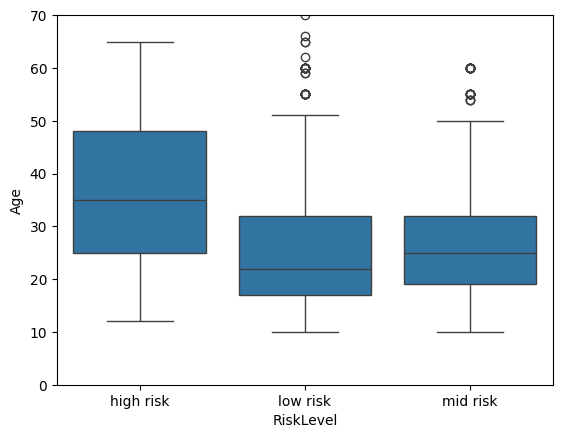

In [9]:
import seaborn as sns
ax = sns.boxplot(x="RiskLevel", y="Age", data=df)
plt.ylim(0, 70)
plt.show()

The boxplot of `RiskLevel` versus `Age` visualizes the distribution of maternal ages within each risk category (low, medium, high).  The box itself represents the interquartile range (IQR), containing the middle 50% of the data, with the line inside indicating the median age for that risk level.  The "whiskers" extend to the minimum and maximum values within 1.5 times the Interquartile Range, and any points beyond the whiskers are considered outliers.

By comparing the boxes and whiskers across the three risk levels, we can observe if there are statistically significant differences in the age distributions among women classified as low, medium, or high risk. The median age for the high-risk group is noticeably higher than the other groups, but for the other risk levels the Interquartile Range is wider, suggesting that age plays a role in determining pregnancy risk.  The overall plot helps assess if age is a predictive factor for maternal health risk.


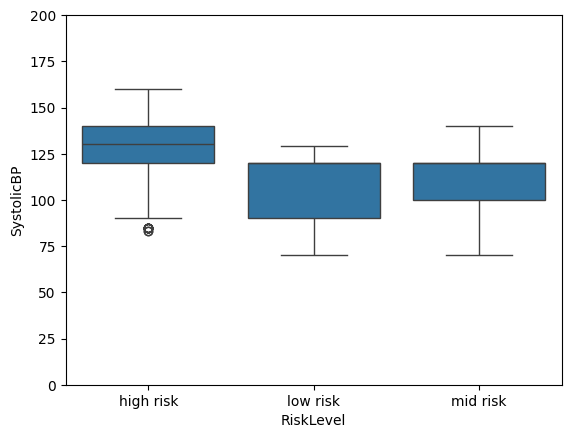

In [33]:
ax = sns.boxplot(x="RiskLevel", y="SystolicBP", data=df)
plt.ylim(0, 200)
plt.show()

The boxplot of `RiskLevel` versus `SystolicBP` shows the distribution of systolic blood pressure (the upper value of blood pressure) for each risk level (low, medium, high).  The box represents the interquartile range (IQR), encompassing the middle 50% of the systolic BP values within each risk group. The line inside the box marks the median systolic BP. The whiskers extend to the minimum and maximum values within 1.5 times the IQR; data points beyond the whiskers are considered outliers.  Comparing the boxes across risk levels reveals potential differences in systolic BP distributions among the groups.  For example, a higher median systolic BP in the high-risk group compared to the low-risk group might suggest a link between higher systolic BP and increased pregnancy risk.  Similarly, wider IQRs in specific risk categories might indicate greater variability in systolic BP within those groups.  The presence of outliers could highlight extreme systolic BP readings and their association with the risk levels.  Overall, the boxplot helps visualize how systolic BP varies across different risk levels, providing insights into its potential as a predictor of pregnancy risk.


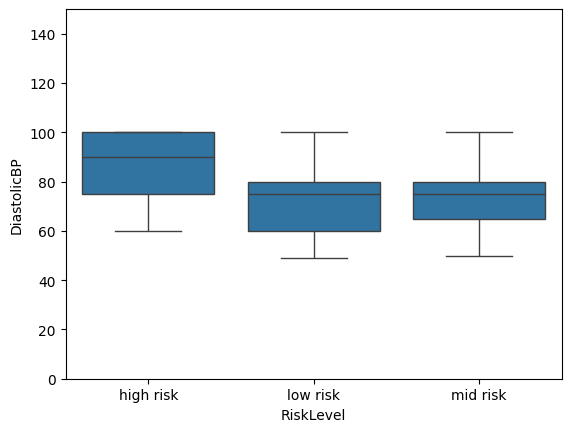

In [54]:
ax = sns.boxplot(x="RiskLevel", y="DiastolicBP", data=df)
plt.ylim(0, 150)
plt.show()

The boxplot of `RiskLevel` versus `DiastolicBP` visualizes the distribution of diastolic blood pressure (the lower value of blood pressure) for each risk level (low, medium, high).  The box itself represents the interquartile range (IQR), which contains the middle 50% of the diastolic BP values within each risk group.  The line inside the box represents the median diastolic BP.  The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR, and any points beyond the whiskers are considered outliers.  By comparing the boxes and whiskers across the three risk levels, we can identify potential differences in the diastolic BP distributions among women categorized as low, medium, or high risk.  For example, a higher median diastolic BP in the high-risk group compared to the low-risk group might suggest a link between higher diastolic BP and increased pregnancy risk.  Similarly, wider IQRs in specific risk categories could indicate greater variability in diastolic BP within those groups. The presence of outliers may highlight extreme diastolic BP readings and their association with the risk levels. Overall, the boxplot helps to visualize how diastolic BP varies across different risk levels, providing insights into its potential as a predictor of pregnancy risk.


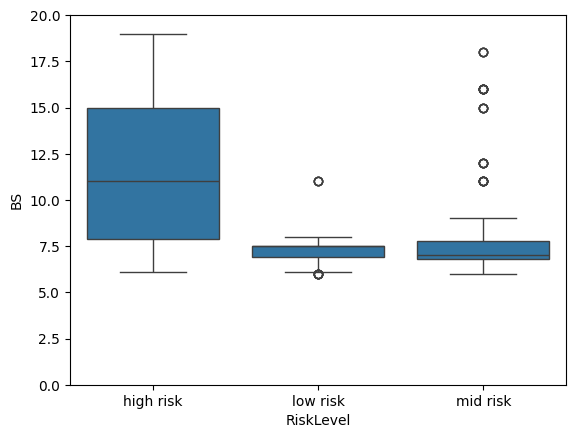

In [52]:
ax = sns.boxplot(x="RiskLevel", y="BS", data=df)
plt.ylim(0, 20)
plt.show()

 The boxplot of `RiskLevel` versus `BS` visualizes the distribution of blood sugar levels for each risk level (low, medium, high).  The box represents the interquartile range (IQR), containing the middle 50% of the blood sugar values within each risk group.  The line inside the box marks the median blood sugar level.  The whiskers extend to the minimum and maximum values within 1.5 times the IQR; data points beyond the whiskers are considered outliers.

 Comparing the boxes across risk levels reveals potential differences in blood sugar distributions.  A higher median blood sugar in the high-risk group might suggest a link between higher blood sugar and increased pregnancy risk.  Wider IQRs in specific risk categories could indicate greater variability in blood sugar within those groups.  Outliers might highlight extreme blood sugar readings and their association with the risk levels.  The boxplot helps visualize how blood sugar varies across different risk levels, offering insights into its potential as a predictor of pregnancy risk.

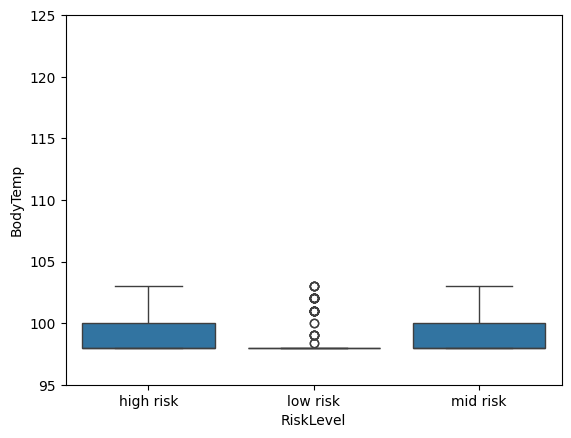

In [62]:
ax = sns.boxplot(x="RiskLevel", y="BodyTemp", data=df)
plt.ylim(95, 125)
plt.show()

The boxplot of `RiskLevel` versus `BodyTemp` visualizes the distribution of body temperature for each risk level (low, medium, high). The box itself represents the interquartile range (IQR), containing the middle 50% of the body temperature values within each risk group.  The line inside the box represents the median body temperature. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR, and any points beyond the whiskers are considered outliers.  Comparing the boxes across the three risk levels allows us to see if there are significant differences in body temperature distributions among women categorized as low, medium, or high risk.  A noticeable difference in the median or IQR across the risk levels could suggest a relationship between body temperature and pregnancy risk.  In this case, women that fall into the 97-100 body temp would be in the levels of mid and high risk. The presence of outliers could highlight extreme body temperature readings and their association with specific risk levels.  Overall, the boxplot helps to visualize how body temperature varies across different risk levels, offering insights into its potential as a predictor of pregnancy risk.


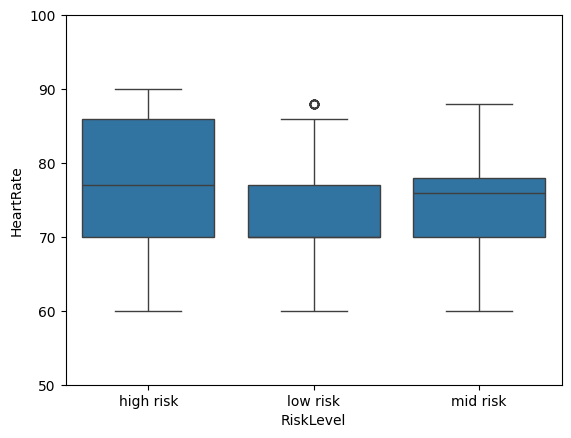

In [64]:
ax = sns.boxplot(x="RiskLevel", y="HeartRate", data=df)
plt.ylim(50, 100)
plt.show()

The boxplot of `RiskLevel` versus `HeartRate` visualizes the distribution of heart rates for each risk level (low, medium, high).  The box represents the interquartile range (IQR), containing the middle 50% of the heart rate values within each risk group. The line inside the box marks the median heart rate. The whiskers extend to the minimum and maximum values within 1.5 times the IQR; data points beyond the whiskers are considered outliers.  Comparing the boxes across risk levels helps identify potential differences in heart rate distributions among the groups.  A higher median heart rate in the high-risk group, for example, might suggest a link between elevated heart rates and increased pregnancy risk. In this case the highest median falls around 80 and categorizes most of the women in the high and mid risk levle. Wider IQRs in certain risk categories could indicate greater variability in heart rates within those groups. Outliers could represent extreme heart rate readings and their association with the risk levels.  The boxplot helps visualize how heart rate varies across different risk levels, providing insights into its potential as a predictor of pregnancy risk.


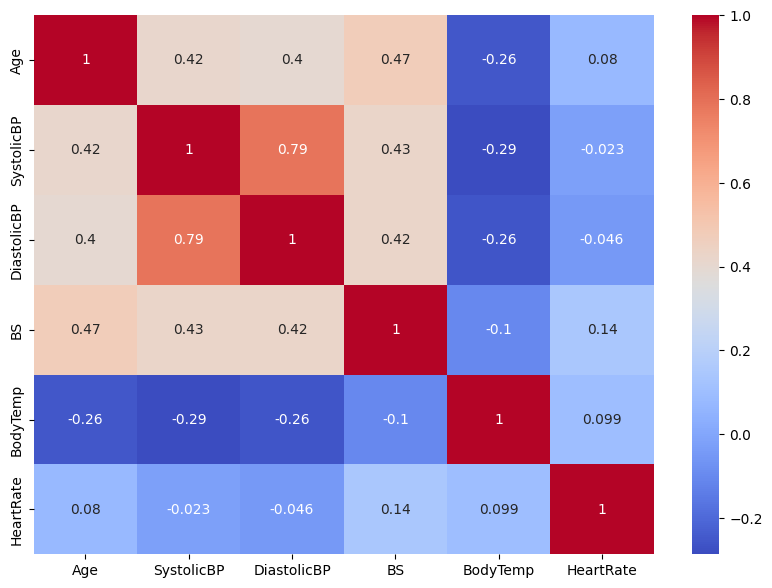

In [69]:
plt.figure(figsize=(10,7))
# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

For the high positive correlation in the heat map, it exists between the variables where the columns are the same for example HeartRate vs HeartRate, BodyTemp vs BodyTemp and this goes on for the rest. Another high positive correlation is between SystolicBP vs DiastolicBP with 0.79.

For the high negative correlation in the heat map, it exists between Age vs HeartRate, Age vs Body Temp, SystolicBP vs HeartRate, SystolicBP vs BodyTemp, DiastoicBP vs HeartRate, DiastolicBP vs BodyTemp, BS vs Heart Rate, BS vs Body Temp, BodyTemp vs HeartRate. Based on this we can see that HeartRate has high negative correlation with all the other variables.

In the heat map where the light color exists, it represents low or no correlation between each other.

##Hypothesis


The primary hypothesis of this analysis is that specific maternal health indicators, including **age**, **systolic blood pressure (SystolicBP)**, **diastolic blood pressure (DiastolicBP)**, **blood sugar levels (BS)**, **body temperature (BodyTemp)**, and **heart rate**, significantly influence the risk level associated with pregnancy (categorized as low, medium, or high risk). I anticipate that abnormal ranges of these variables, such as elevated blood pressure, abnormal blood sugar levels, or irregular heart rate, are correlated with an increased likelihood of a high-risk pregnancy. On the other hand, women with values that fall within normal ranges for these health indicators are more likely to be categorized as low risk.  

I also hypothesize that certain demographic factors, such as **maternal age**, may have a non-linear relationship with pregnancy risk levels. For example, I expect that women in their late teens and older mothers (above 35 years) may face higher risks compared to women aged 20-35, due to the potential biological and health-related challenges associated with these age groups. By analyzing the distributions and relationships of these variables with the target variable, *RiskLevel*, I aim to identify the key factors that serve as strong predictors of maternal risk. I believe this understanding will help in developing better-targeted maternal healthcare strategies, enabling early identification and management of high-risk pregnancies.  

Finally, I hypothesize that the dataset will show imbalances across the risk levels, with a relatively higher proportion of low-risk pregnancies compared to medium- or high-risk categories. I will take this imbalance into account during model building and evaluation to ensure that predictive performance remains robust across all risk levels.

#Predictive Analysis

##First Model: Decision Tree

In [18]:
features = df.drop('RiskLevel', axis=1)

In [19]:
target = df['RiskLevel']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

In [21]:
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [22]:
# decision trees
model = DecisionTreeClassifier()

cv = KFold(n_splits=5,  shuffle = True)

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=cv)

# performing grid search
grid.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'criterion': 'gini', 'max_depth': 17}
Accuracy: 0.81 (0.76,0.87)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
from sklearn.metrics import accuracy_score

pred_train = grid.best_estimator_.predict(X_train)
training_accuracy = accuracy_score(y_train, pred_train)
training_accuracy = round(training_accuracy, 2)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.93


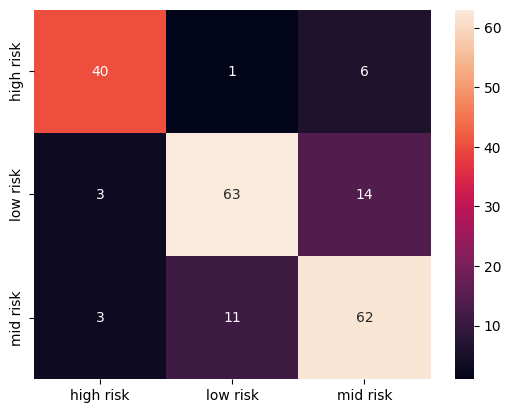

In [26]:
# build the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
labels = list(target.unique())
cm = confusion_matrix(y_true= y_test,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
f = sns.heatmap(cm_df, annot=True, fmt='d')

The model performs relatively well overall, with the highest accuracy in predicting **Low Risk** (63 correct predictions) and **Medium Risk** (62 correct predictions), while it performs the weakest on **High Risk** (40 correct predictions). However, it struggles with misclassifying **Low Risk** and **Medium Risk** cases, as evidenced by the relatively high number of misclassifications between these two categories, particularly **Low Risk** being misclassified as **Medium Risk**. This suggests that the model may have difficulty distinguishing between these risk levels.

In [31]:
from sklearn.metrics import accuracy_score, recall_score
print("Recall: {:3.2f}".format(recall_score(y_test, pred_test, average='weighted', pos_label='Yes')))

Recall: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [34]:
from sklearn.metrics import accuracy_score, precision_score
print("Precision: {:3.2f}".format(precision_score(y_test, pred_test, average='weighted', pos_label='Yes')))

Precision: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [39]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print("Balanced Accuracy: {:3.2f}".format(balanced_accuracy_score(y_test, pred_test)))

Balanced Accuracy: 0.82


In [42]:
from sklearn.metrics import accuracy_score, f1_score
print("F1 Score: {:3.2f}".format(f1_score(y_test, pred_test, average='weighted', pos_label='Yes')))

F1 Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


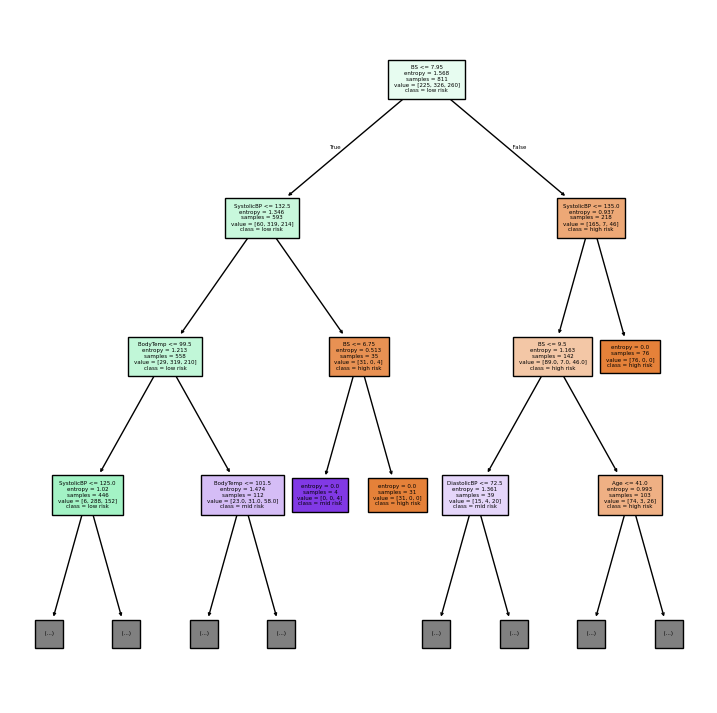

[Ellipsis]

In [143]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=100)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= list(target.unique()))
plt.show()
[...]

##Second Model: k-NN

In [43]:
# basic data routines
import pandas as pd
from google.colab import files
import io
#splitting the data
from sklearn.model_selection import KFold,train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [45]:
# compute 95% confidence intervals for classification and regression
# problems

def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [46]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [47]:
features = df.drop('RiskLevel', axis=1)
target = df['RiskLevel']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=3)

In [49]:
model = KNeighborsClassifier(n_neighbors=3)

In [50]:
# some basic data stats
print("Shape: {}".format(df.shape))
print("Value Counts on the 'RiskLevel' Field:")
print(df['RiskLevel'].value_counts())

Shape: (1014, 7)
Value Counts on the 'RiskLevel' Field:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [51]:
#train the model
model.fit(X_train, y_train)
predict_y = model.predict(X_test)

#test the model accuracy
acc = accuracy_score(y_test, predict_y)
lb, ub = classification_confint(acc, X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

Accuracy: 0.76 (0.70, 0.82)


In [52]:
# KNN
model = KNeighborsClassifier()

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=cv)

# performing grid search
grid.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'n_neighbors': 1}
Accuracy: 0.86 (0.81,0.91)


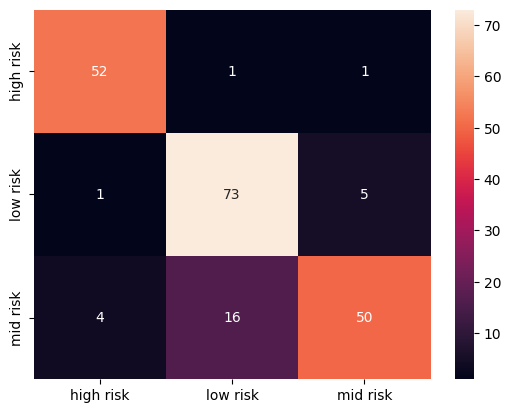

In [53]:
import seaborn as sns
# build the confusion matrix
labels = list(target.unique())
cm = confusion_matrix(y_true= y_test,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
f = sns.heatmap(cm_df, annot=True, fmt='d')

The confusion matrix shows a relatively high accuracy in predicting low-risk cases, with 73 out of 79 correctly classified. However, medium-risk cases have the highest misclassification rate, with 16 medium-risk cases being mistakenly predicted as low risk and 4 cases as high risk. For high-risk cases, the model is reasonably accurate, correctly predicting 52 out of 54 high-risk pregnancies, though it still misclassifies 2 cases (one as low risk and one as medium risk).

This indicates that the model performs well in distinguishing low-risk and high-risk cases, but struggles with medium-risk pregnancies, likely due to overlapping features or difficulty in separating these categories.

In [54]:
from sklearn.metrics import accuracy_score

pred_train = grid.best_estimator_.predict(X_train)
training_accuracy = accuracy_score(y_train, pred_train)
training_accuracy = round(training_accuracy, 2)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.89


In [55]:
from sklearn.metrics import accuracy_score, recall_score
print("Recall: {:3.2f}".format(recall_score(y_test, pred_test, average='weighted', pos_label='Yes')))

Recall: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [56]:
from sklearn.metrics import accuracy_score, precision_score
print("Precision: {:3.2f}".format(precision_score(y_test, pred_test, average='weighted', pos_label='Yes')))

Precision: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [57]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print("Balanced Accuracy: {:3.2f}".format(balanced_accuracy_score(y_test, pred_test)))

Balanced Accuracy: 0.87


In [58]:
from sklearn.metrics import accuracy_score, f1_score
print("F1 Score: {:3.2f}".format(f1_score(y_test, pred_test, average='weighted', pos_label='Yes')))

F1 Score: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [59]:
y_test.value_counts()

,count
RiskLevel,
low risk,79
mid risk,70
high risk,54


##Third Model: MLP Model

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [70]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

print("Shape: {}".format(X.shape))


Shape: (1014, 6)


In [78]:
modelClass = MLPClassifier(max_iter=10000, random_state=1)
param_grid = {
    'hidden_layer_sizes':
      [
      (10,), (20,),
      ],
    'activation' : ['relu', 'logistic']
}

grid = GridSearchCV(modelClass, param_grid, cv=3)
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (20,)}
Accuracy: 0.64 (0.61,0.67)


In [79]:
modelClass = MLPClassifier(max_iter=10000, random_state=1)
param_grid = {
    'hidden_layer_sizes':
      [
      (10,10), (20,10),
      ],
    'activation' : ['relu', 'logistic']
}

grid = GridSearchCV(modelClass, param_grid, cv=3)
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (20, 10)}
Accuracy: 0.64 (0.61,0.67)


The MLPClassifier is trying to find patterns in the dataset that map the input features (e.g., age, blood pressure, blood sugar, etc.) to the target variable (RiskLevel), which categorizes the pregnancy risk into low, medium, or high.

The neural network adjusts the weights of the neurons during training to minimize the error (loss function), and through this process, it learns the complex relationships between the features and the risk levels.

The ultimate goal is for the trained model to accurately predict the RiskLevel for new, unseen data based on the patterns it learned during training. The grid search helps optimize the network's architecture and activation function, ensuring the model performs at its best.

##Fourth Model: Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import pandas as pd
import math


In [37]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [38]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
observations = X_test.shape[0]
lb, ub = classification_confint(nb_accuracy, observations)
print("Accuracy of Naive Bayes model: {:3.2f} ({:3.2f},{:3.2f})".format(nb_accuracy, lb, ub))

Accuracy of Naive Bayes model: 0.53 (0.46,0.60)


In [39]:
# Confusion Matrix
labels = list(target.unique())
cm = confusion_matrix(y_true=y_test, y_pred=nb_predictions, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
           high risk  low risk  mid risk
high risk         33        13         1
low risk          17        60         3
mid risk          13        48        15


The **Naive Bayes model** is used to classify pregnancy risk levels (Low, Medium, High) based on features like age, blood pressure, and blood sugar. It calculates the probability of each class using Bayes' theorem, assuming feature independence. The **accuracy** of the model is measured by comparing predicted values with actual risk levels from the test set. A **confidence interval** is also calculated to provide a range for the true accuracy, indicating the model's reliability and performance variability.

The confusion matrix for the High Risk, Low Risk, and Medium Risk categories reveals how well the model performed in predicting pregnancy risk levels. The model accurately classified 33 high-risk cases, 60 low-risk cases, and 15 medium-risk cases. However, there were some notable misclassifications: 13 high-risk cases were incorrectly predicted as low risk, and 1 case as medium risk. For low-risk pregnancies, 17 were misclassified as high risk, and 3 as medium risk. Similarly, for medium-risk pregnancies, 13 were incorrectly predicted as high risk, and 48 as low risk. These misclassifications indicate that the model performs well with low-risk cases but struggles with distinguishing between medium and high-risk categories. The frequent misclassification of medium-risk pregnancies as low risk suggests that the model may have difficulty differentiating these categories.

##Fifth Model: SVM Model

In [35]:
# prompt: generate a svm model with the confidence interval shown

from sklearn.svm import SVC

# Assuming features and target are already defined from previous code
# features = df.drop('RiskLevel', axis=1)
# target = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(probability=True) # probability=True for confidence scores
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Get confidence scores (probabilities)
confidence_scores = svm_model.predict_proba(X_test)

# Calculate accuracy and confidence interval
acc = accuracy_score(y_test, y_pred)
lb, ub = classification_confint(acc, X_test.shape[0])

print("Accuracy of SVM model: {:3.2f} ({:3.2f},{:3.2f})".format(acc, lb, ub))



Accuracy of SVM model: 0.60 (0.53,0.66)


The **Support Vector Machine (SVM)** model is used to classify pregnancy risk levels (Low, Medium, High) based on features like age, blood pressure, and blood sugar. It finds the optimal boundary to separate different risk categories. The model also provides **confidence scores** (probabilities) for predictions, indicating the certainty of each classification. The model's **accuracy** is evaluated against the test set, and a **confidence interval** is calculated to measure the reliability and variability of its performance.

#Predictive Analysis on the best two models

My two best models are the Decision Tree and the k-NN models. The 'Decision Tree' model had an accuracy and confidence intervals of 0.80(0.74, 0.85). The 'k-NN' model had an accuracy and confidence intervals of 0.86(0.81, 0.91).

As the top model I would choose is the k-NN model because it has a higher accuracy than the decision tree. The confidence intervals for the k-NN model do not overlap significantly with the Decision Tree's confidence interval indicating that the k-N model has consistently better performance.

There is a minimal overlap between the two intervals(intersecting at 0.81 and 0.85) suggesting the difference in accuracy is statistically significant.

The training accuracy for the Decision Tree model is 0.93 and the test accuracy is 0.80. The training accuracy for the k-NN  model is 0.89 and the test accuracy is 0.86. For the Decision Tree model there is likely overfitting due to the 13% gap as compared to the k-NN model that has only a 3% gap suggesting that it isn't overfitting as much as the Decision Tree model.

Additionally, the k-NN model demonstrates better recall (0.86) and precision (0.87) compared to the Decision Tree’s recall (0.81) and precision (0.82). This suggests that k-NN correctly identifies more positive cases and does so with higher reliability. The balanced accuracy of 0.87 for k-NN further highlights its superior ability to handle imbalanced data compared to the Decision Tree's balanced accuracy of 0.82. Finally, the F1 score, which balances precision and recall, is also higher for k-NN (0.86) than for the Decision Tree (0.81), solidifying its overall better performance.

#Model Interpretation

In [60]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [61]:
maternal_features = df.drop('RiskLevel', axis=1)
target = df.RiskLevel

In [63]:
maternal_data12 = df[df.RiskLevel != 3]
maternal_features12 = maternal_data12.drop('RiskLevel', axis=1)
target12 = maternal_data12.RiskLevel

In [64]:
maternal_data23 = df[df.RiskLevel != 1]
maternal_features23 = maternal_data23.drop('RiskLevel', axis=1)
target23 = maternal_data23.RiskLevel

In [65]:
maternal_data13 = df[df.RiskLevel != 2]
maternal_features13 = maternal_data13.drop('RiskLevel', axis=1)
target13 = maternal_data13.RiskLevel

In [68]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(maternal_features, target, test_size=0.2, shuffle=True, random_state=42)

In [69]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(maternal_features12, target12, test_size=0.2, shuffle=True, random_state=42)


In [70]:
X_train23, X_test23, y_train23, y_test23 = train_test_split(maternal_features23, target23, test_size=0.2, shuffle=True, random_state=42)


In [71]:
X_train13, X_test13, y_train13, y_test13 = train_test_split(maternal_features13, target13, test_size=0.2, shuffle=True, random_state=42)


In [72]:
def balanced_accuracy_score(model, X_train, X_test, y_train):
  from sklearn.metrics import balanced_accuracy_score

  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)


In [73]:
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
#From the model selection library import logistic regression
from sklearn.linear_model import LogisticRegression

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

#models is a logistic regression model
lr=LogisticRegression(random_state=0, max_iter=10000) #maximum iteration is set to a high value of 10,000

scores = cross_val_score(lr, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
lr_mean_score=scores.mean()
lr_balanced_acc=balanced_accuracy_score(lr, X_train, X_test, y_train)

Fold Accuracies: [0.66 0.65 0.59 0.63 0.63]


In [74]:
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
rf_mean_score=scores.mean()
rf_balanced_acc=balanced_accuracy_score(rf, X_train, X_test, y_train)

Fold Accuracies: [0.85 0.80 0.80 0.80 0.83]


In [84]:
import xgboost
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score


# XGBClassifier
xgb = xgboost.XGBClassifier(random_state=42)

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_train)

# Transform target variable to numerical values
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

scores = cross_val_score(xgb, X_train, y_train_encoded,cv=cv)

print("Fold Accuracies: {}".format(scores))
xgb_mean_score=scores.mean()

#I had to do it this way because my target variable is categorical
xgb.fit(X_train, y_train_encoded)
pred_test_encoded = xgb.predict(X_test)
pred_test = label_encoder.inverse_transform(pred_test_encoded)  # Decode predictions
xgb_balanced_acc = balanced_accuracy_score(y_test, pred_test)  # Use original y_test

Fold Accuracies: [0.82 0.82 0.82 0.80 0.83]


In [86]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_train12)

# Transform target variable to numerical values
y_train12_encoded = label_encoder.transform(y_train12)


# XGBClassifier
xgb12 = xgboost.XGBClassifier(random_state=42).fit(X_train12.values, y_train12_encoded)

# do the 5-fold cross validation and shuffle the data
cv12 = KFold(n_splits=5,  shuffle = True)

scores12 = cross_val_score(xgb12, X_train12, y_train12_encoded,cv=cv)

print("Fold Accuracies: {}".format(scores12))

Fold Accuracies: [0.82 0.80 0.85 0.89 0.83]


In [87]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_train23)

# Transform target variable to numerical values
y_train23_encoded = label_encoder.transform(y_train23)


# XGBClassifier
xgb23 = xgboost.XGBClassifier(random_state=42).fit(X_train23.values, y_train23_encoded)

# do the 5-fold cross validation and shuffle the data
cv23 = KFold(n_splits=5,  shuffle = True)

scores23 = cross_val_score(xgb23, X_train23, y_train23_encoded,cv=cv)

print("Fold Accuracies: {}".format(scores23))

Fold Accuracies: [0.80 0.80 0.86 0.88 0.81]


In [88]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_train13)

# Transform target variable to numerical values
y_train13_encoded = label_encoder.transform(y_train13)


# XGBClassifier
xgb13 = xgboost.XGBClassifier(random_state=42).fit(X_train13.values, y_train13_encoded)

# do the 5-fold cross validation and shuffle the data
cv13 = KFold(n_splits=5,  shuffle = True)

scores13 = cross_val_score(xgb13, X_train13, y_train13_encoded,cv=cv)

print("Fold Accuracies: {}".format(scores13))

Fold Accuracies: [0.80 0.85 0.83 0.80 0.83]


In [89]:
acc_scores = pd.DataFrame([ [lr_mean_score, lr_balanced_acc],[rf_mean_score, rf_balanced_acc],[xgb_mean_score, xgb_balanced_acc] ],  columns=['Mean Accuracy', 'Balanced accuracy'],
                      index =['Logistic Regression', 'Random Forest', 'XGBoost'] )
acc_scores

,Mean Accuracy,Balanced accuracy
Logistic Regression,0.631288,0.671627
Random Forest,0.813770,0.818556
XGBoost,0.818746,0.846482


[Ellipsis]

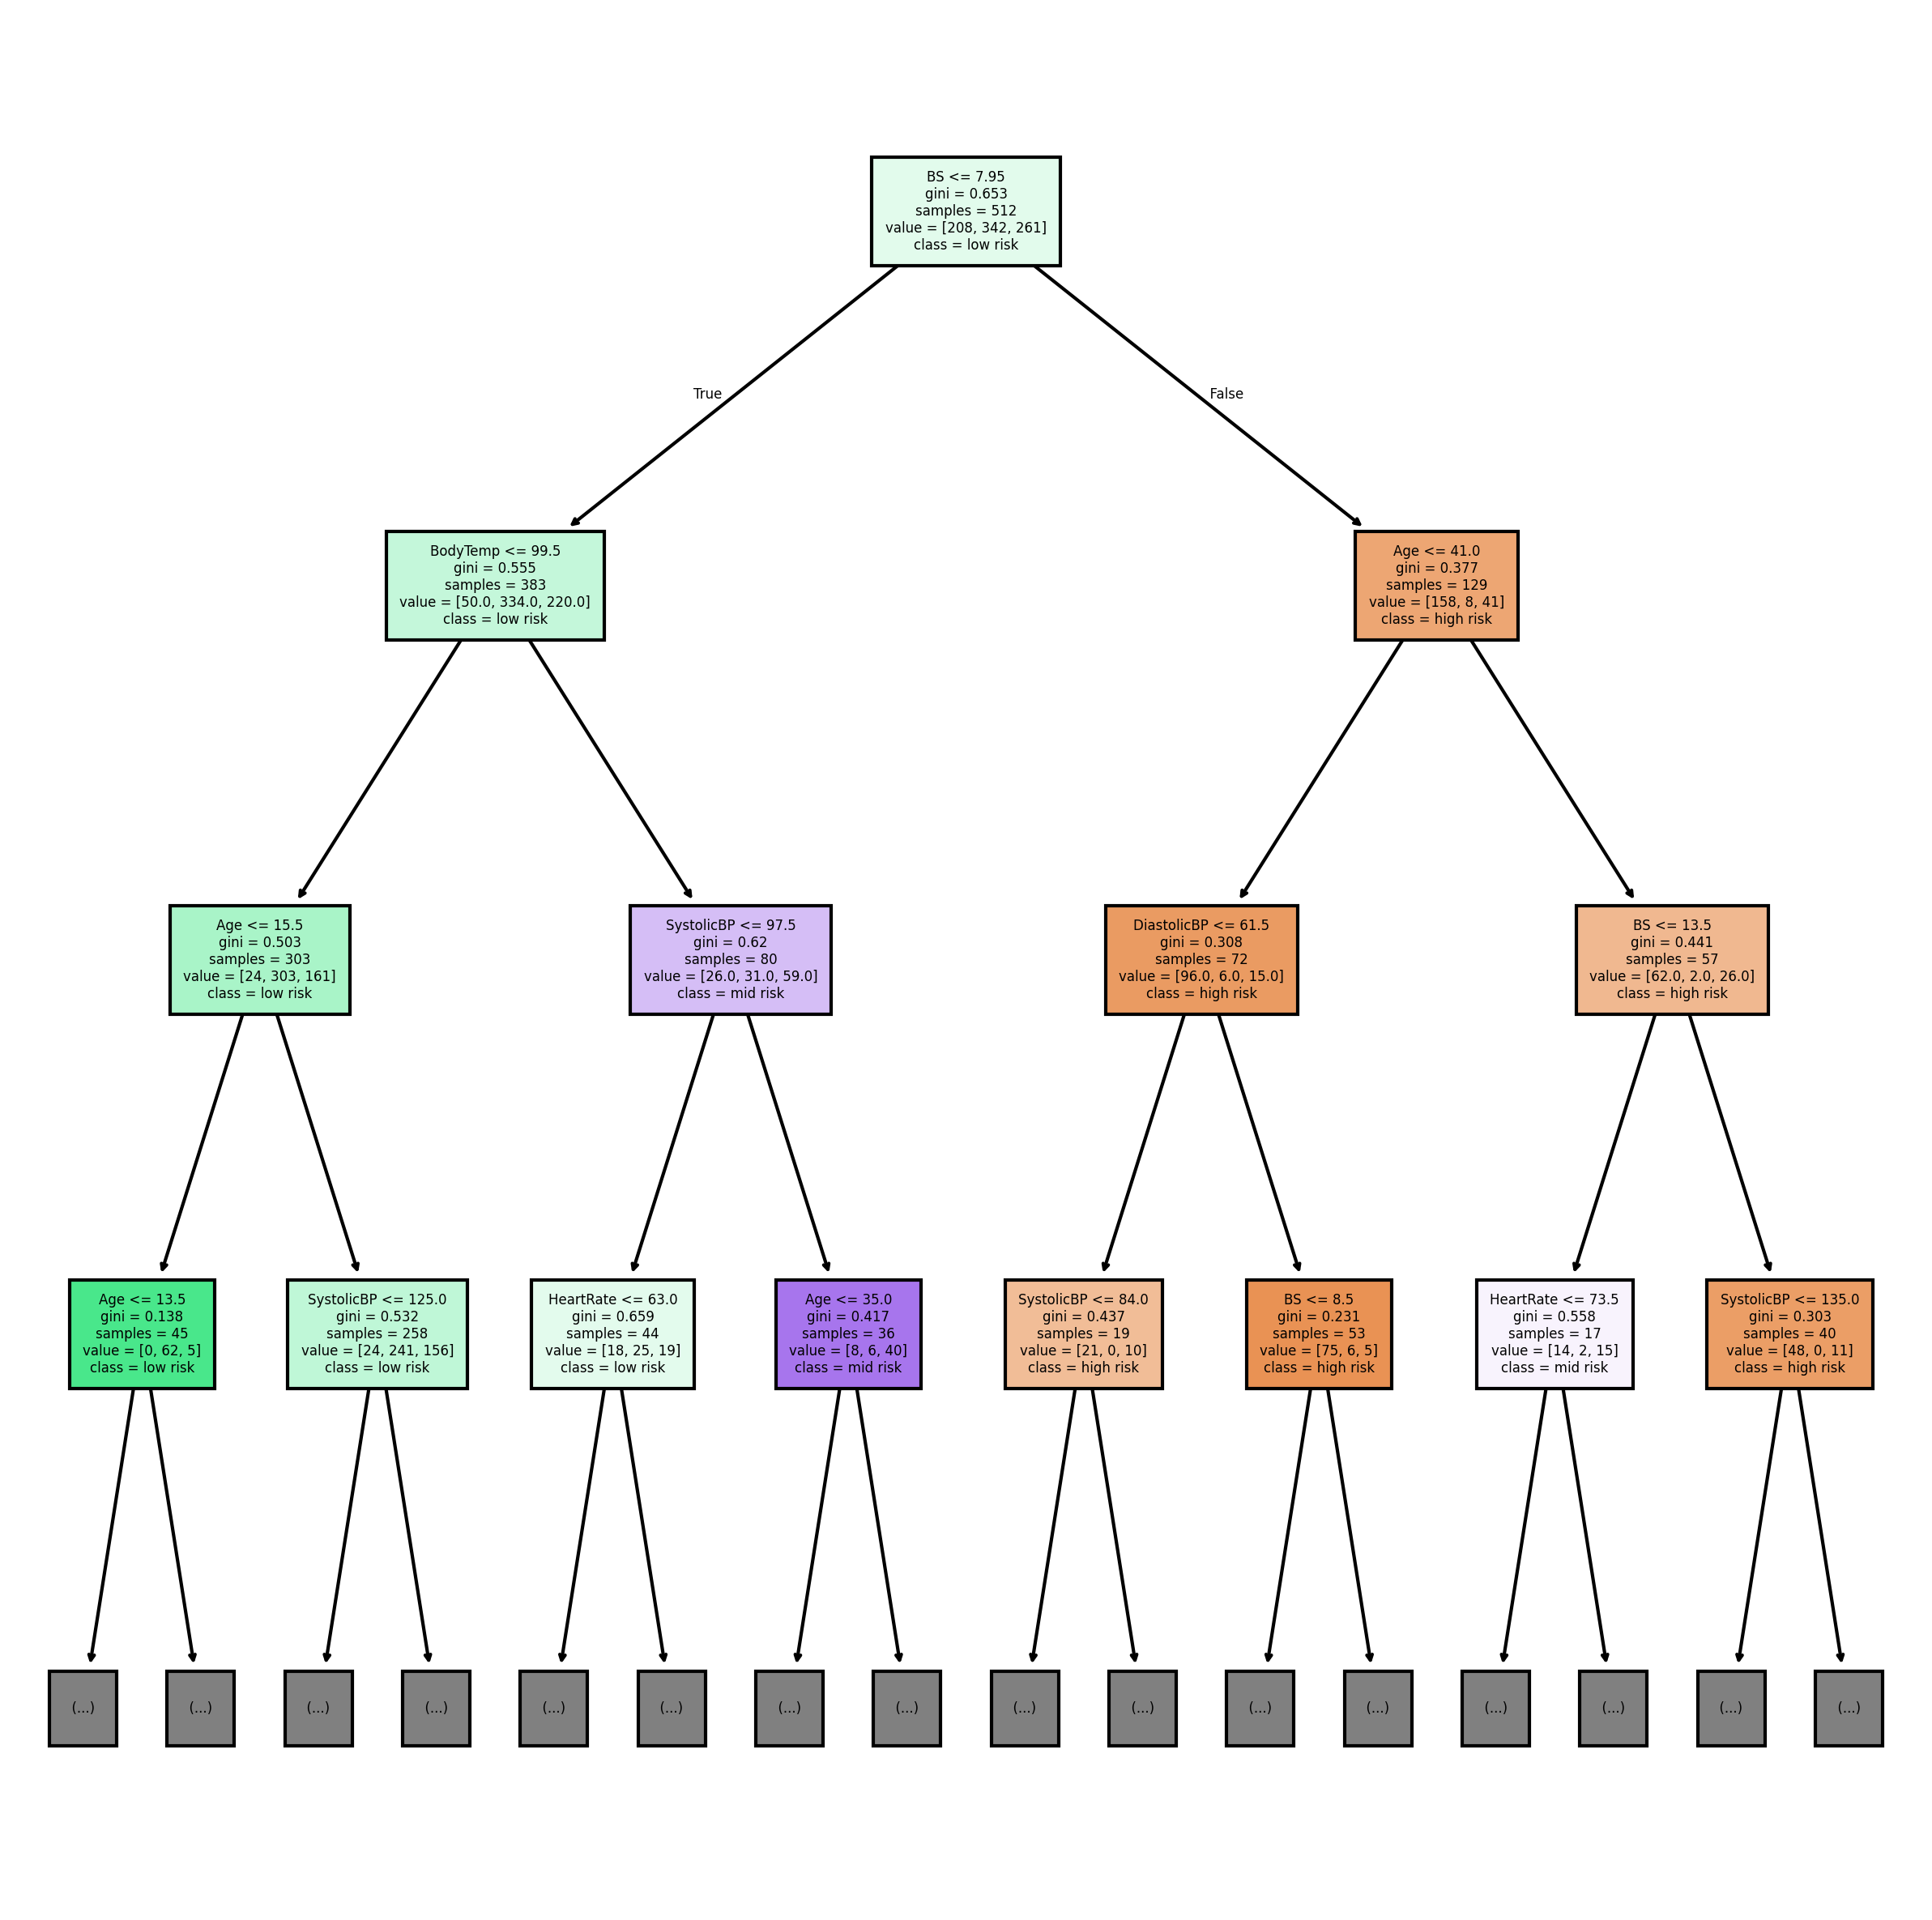

In [92]:
# Visualize a tree model from random forest
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
plot_tree(decision_tree = rf.estimators_[0],
          fontsize=4, filled=True,
          max_depth=3,
          feature_names=maternal_features.columns,
          class_names= target.unique())
[...]

Features like SystolicBP, DiastolicBP, Age, and Blood Sugar (BS) emerge as critical factors, with Blood Pressure and Age frequently appearing near the root of the tree. This placement underscores their importance in determining pregnancy risk. Other features, such as Body Temperature and Heart Rate, play smaller roles but are still relevant in specific contexts.

The decision tree reveals clear thresholds for predicting risk levels. For example, elevated SystolicBP and advanced maternal age often lead to high-risk predictions, while lower Blood Pressure and normal Blood Sugar are associated with low risk. These decision rules align with domain knowledge about maternal health factors.

In [93]:
!pip install shap

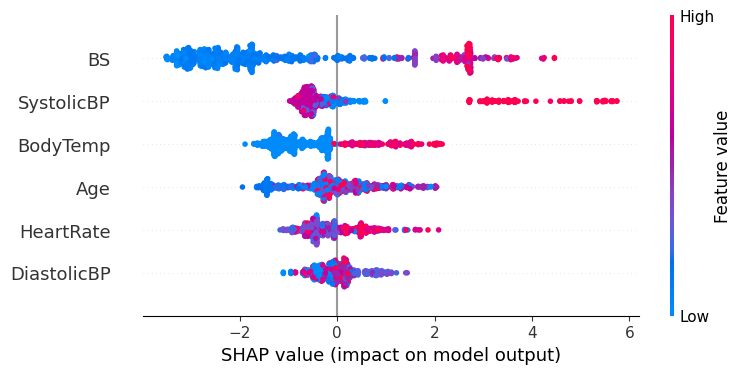

In [111]:
import shap

explainer12 = shap.Explainer(xgb12)
shap_values12 = explainer12(X_train12)

shap.plots.beeswarm(shap_values12[:, :, 0])


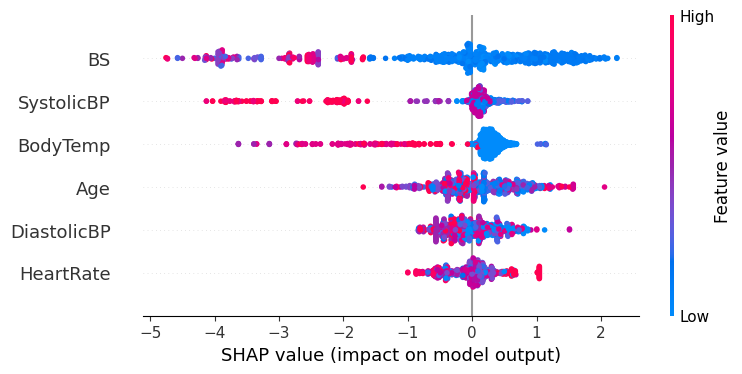

In [122]:
import shap

explainer12 = shap.Explainer(xgb12)
shap_values12 = explainer12(X_train12)

shap.plots.beeswarm(shap_values12[:, :, 1])


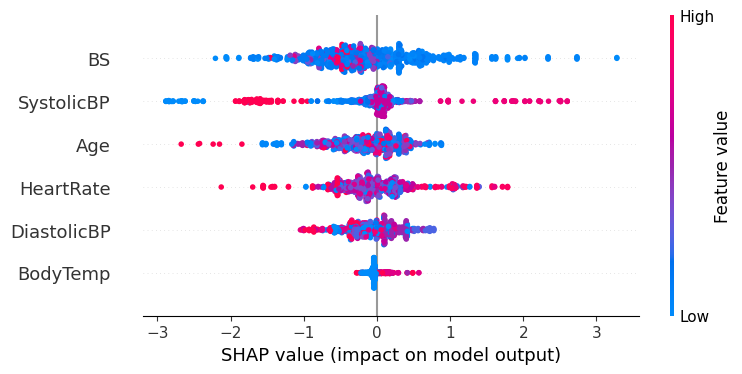

In [125]:
import shap

explainer12 = shap.Explainer(xgb12)
shap_values12 = explainer12(X_train12)

shap.plots.beeswarm(shap_values12[:, :, 2])


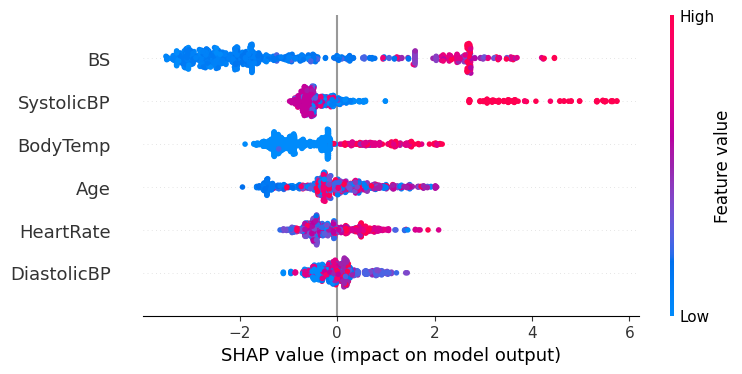

In [112]:
import shap

explainer23 = shap.Explainer(xgb23)
shap_values23 = explainer12(X_train23)

shap.plots.beeswarm(shap_values23[:, :, 0])


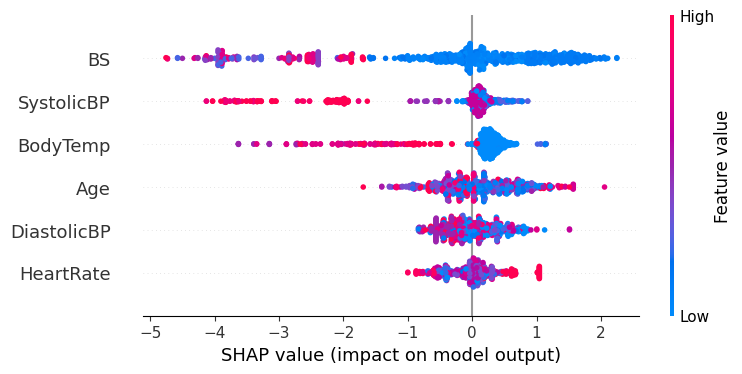

In [127]:
import shap

explainer23 = shap.Explainer(xgb23)
shap_values23 = explainer12(X_train23)

shap.plots.beeswarm(shap_values23[:, :, 1])


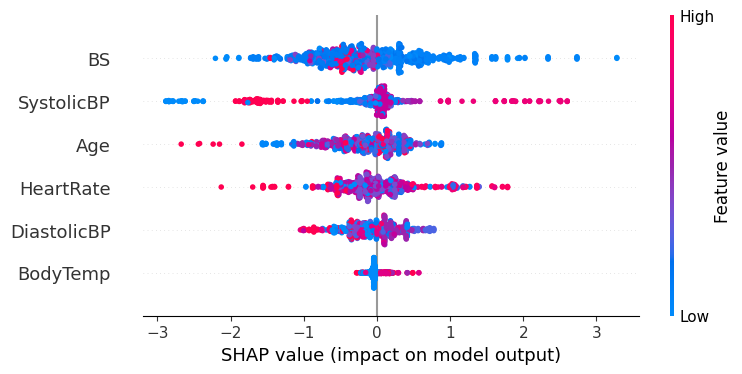

In [128]:
import shap

explainer23 = shap.Explainer(xgb23)
shap_values23 = explainer12(X_train23)

shap.plots.beeswarm(shap_values23[:, :, 2])


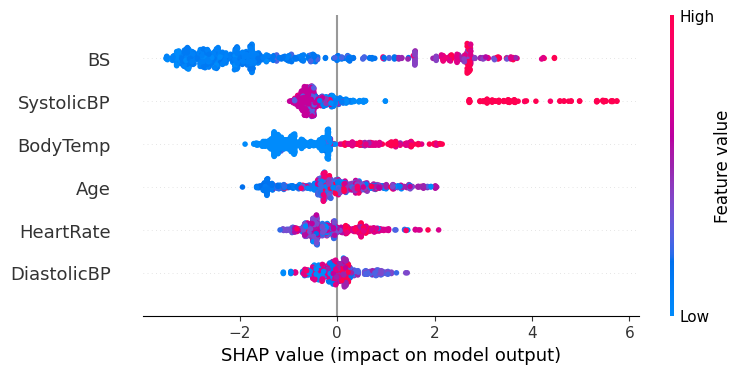

In [113]:
import shap

explainer13 = shap.Explainer(xgb13)
shap_values13 = explainer12(X_train13)

shap.plots.beeswarm(shap_values13[:, :, 0])


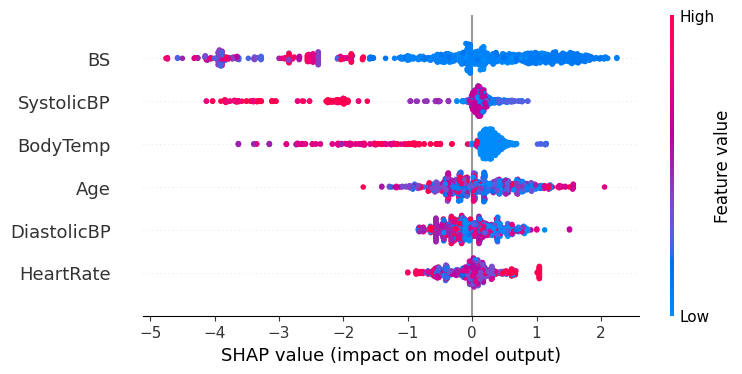

In [129]:
import shap

explainer13 = shap.Explainer(xgb13)
shap_values13 = explainer12(X_train13)

shap.plots.beeswarm(shap_values13[:, :, 1])


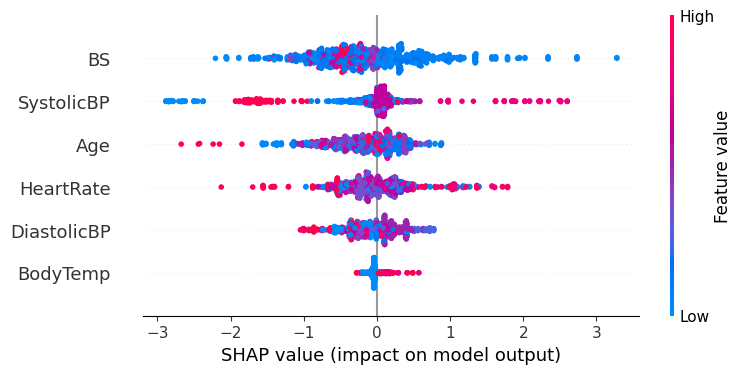

In [130]:
import shap

explainer13 = shap.Explainer(xgb13)
shap_values13 = explainer12(X_train13)

shap.plots.beeswarm(shap_values13[:, :, 2])


Overall, the most predictive features are SystolicBP, DiastolicBP, and BS.

In my case, I had to create multiple graphs because of the 3x3 matrix classes that my dataset contains

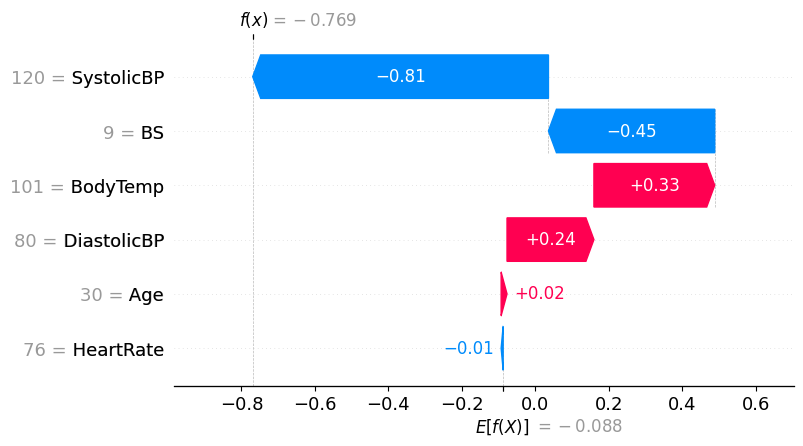

In [114]:
shap.plots.waterfall(shap_values12[0, :, 0])

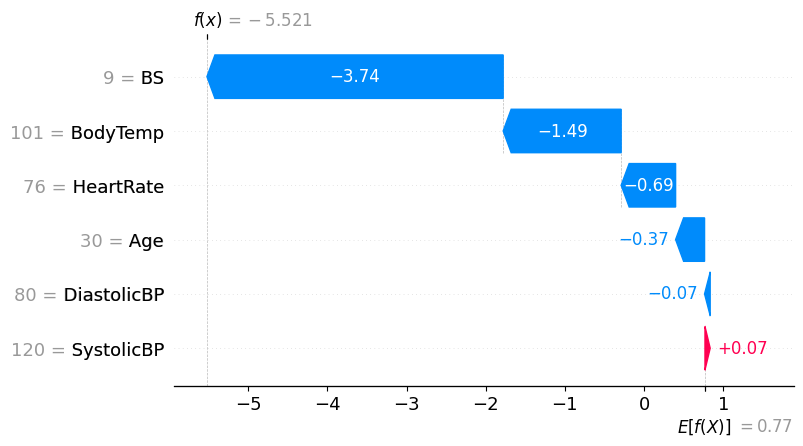

In [131]:
shap.plots.waterfall(shap_values12[0, :, 1])

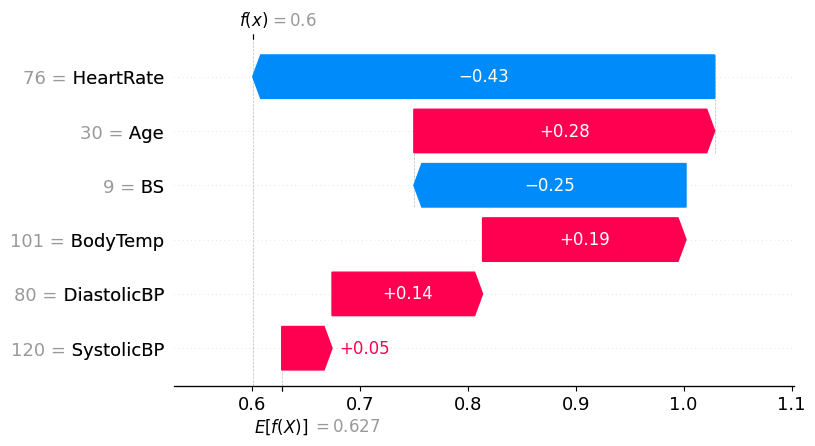

In [132]:
shap.plots.waterfall(shap_values12[0, :, 2])

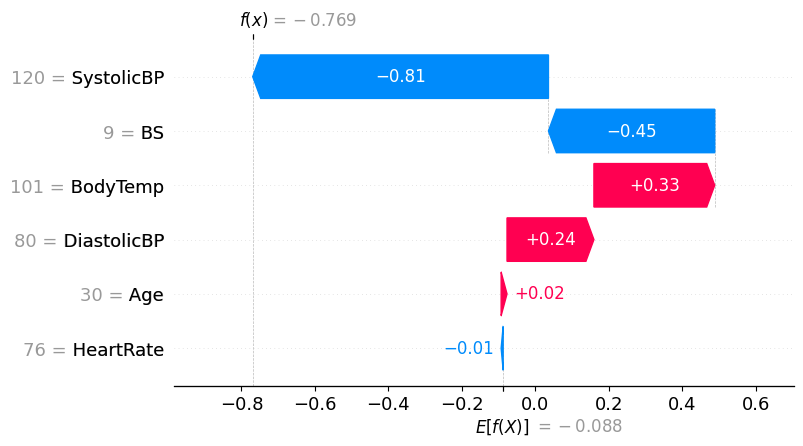

In [115]:
shap.plots.waterfall(shap_values23[0, :, 0])

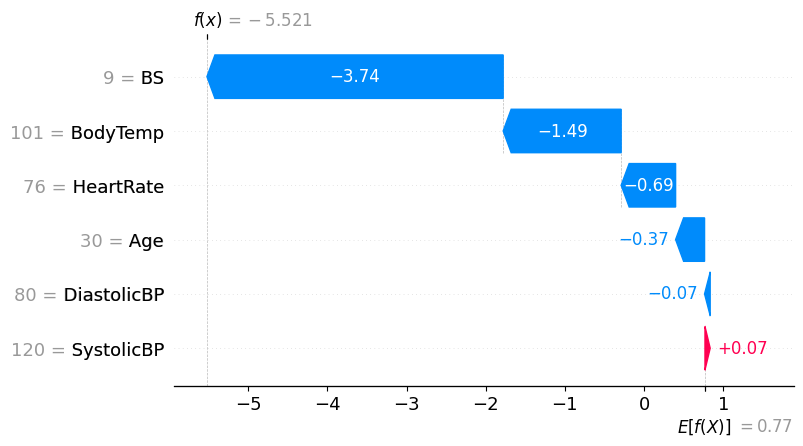

In [133]:
shap.plots.waterfall(shap_values23[0, :, 1])

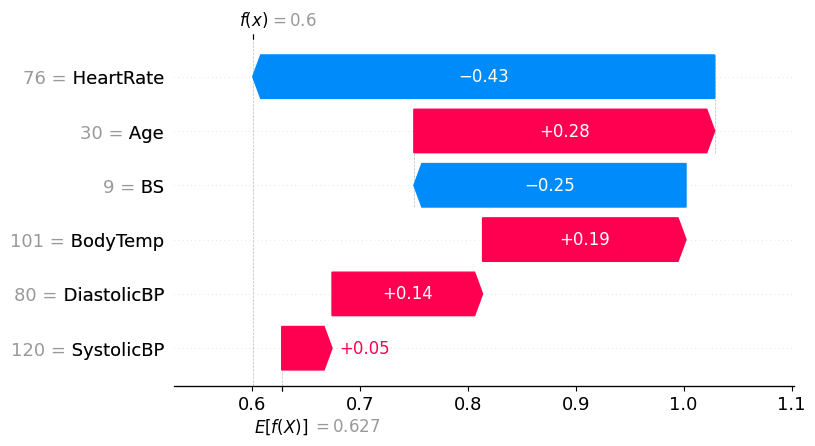

In [134]:
shap.plots.waterfall(shap_values23[0, :, 2])

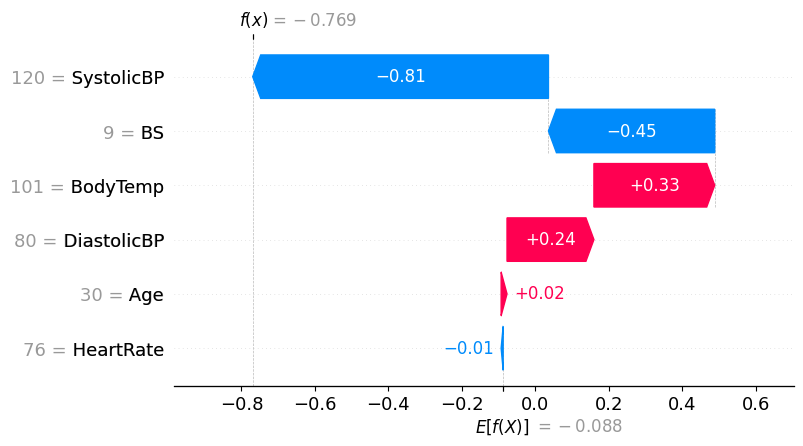

In [116]:
shap.plots.waterfall(shap_values13[0, :, 0])

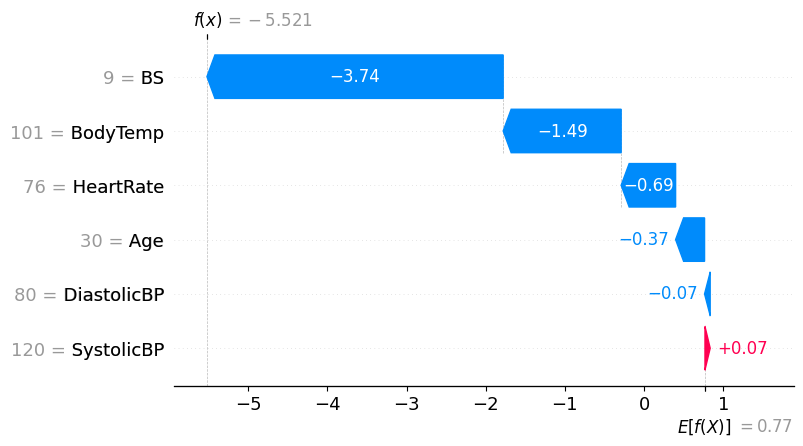

In [135]:
shap.plots.waterfall(shap_values13[0, :, 1])

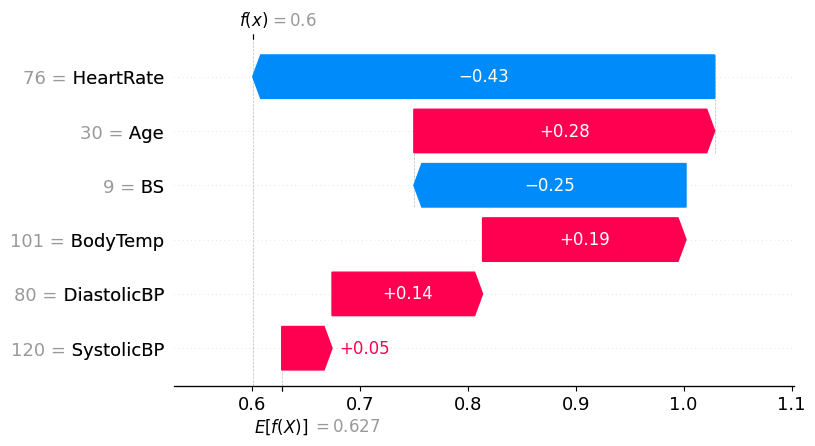

In [136]:
shap.plots.waterfall(shap_values13[0, :, 2])

In [223]:
import shap
import numpy as np
from collections import Counter

def get_top_features(shap_values, feature_names, top_n=5):
    """
    Gets the top N features based on SHAP values.

    Args:
        shap_values: SHAP values.
        feature_names: List of feature names.
        top_n: Number of top features to return.

    Returns:
        A list of the top N feature names.
    """
    # Ensure SHAP values are in the correct format
    if hasattr(shap_values, 'values'):
        feature_importance = np.abs(shap_values.values).mean(axis=0)
    else:
        raise ValueError("Invalid SHAP values format. Ensure 'shap_values' has a 'values' attribute.")

    # Get indices of the top N features
    top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
    return [feature_names[i] for i in top_feature_indices]

# Function to analyze top features for all combinations
def analyze_shap_features(shap_values_dict, feature_names, top_n=5):
    """
    Analyzes SHAP values across multiple models and classes to find top features.

    Args:
        shap_values_dict: Dictionary of SHAP values for different models/classes.
        feature_names: List of feature names.
        top_n: Number of top features to return for each class/model.

    Returns:
        Dictionary of top features and their overall importance.
    """
    top_features = {}

    # Analyze top features for each model/class combination
    for key, shap_values in shap_values_dict.items():
        class_top_features = {}
        for class_idx in range(shap_values.shape[2]):  # Iterate over classes
            class_top_features[f"Class {class_idx}"] = get_top_features(shap_values[:, :, class_idx], feature_names, top_n)
        top_features[key] = class_top_features

    # Combine all features into a single list for global importance ranking
    all_top_features = []
    for model_classes in top_features.values():
        for features in model_classes.values():
            all_top_features.extend(features)

    # Calculate overall feature importance
    feature_counts = Counter(all_top_features)

    return top_features, feature_counts

# Example usage (assuming shap_values12, shap_values23, shap_values13 are already defined)
shap_values_dict = {
    "1 vs 2": shap_values12,
    "2 vs 3": shap_values23,
    "1 vs 3": shap_values13
}

# Feature names from training data
feature_names = X_train12.columns

# Analyze SHAP features
top_features, feature_counts = analyze_shap_features(shap_values_dict, feature_names, top_n=5)

# Print detailed top features for each model/class combination
print("Detailed Top Features for Each Model/Class Combination:")
for model, classes in top_features.items():
    print(f"\nModel: {model}")
    for class_name, features in classes.items():
        print(f"  {class_name}: {features}")

# Print overall feature importance across all models/classes
print("\nOverall Feature Importance (based on frequency across top features):")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")


Detailed Top Features for Each Model/Class Combination:

Model: 1 vs 2
  Class 0: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'HeartRate']
  Class 1: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'DiastolicBP']
  Class 2: ['BS', 'SystolicBP', 'Age', 'HeartRate', 'DiastolicBP']

Model: 2 vs 3
  Class 0: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'HeartRate']
  Class 1: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'DiastolicBP']
  Class 2: ['BS', 'SystolicBP', 'Age', 'HeartRate', 'DiastolicBP']

Model: 1 vs 3
  Class 0: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'HeartRate']
  Class 1: ['BS', 'SystolicBP', 'BodyTemp', 'Age', 'DiastolicBP']
  Class 2: ['BS', 'SystolicBP', 'Age', 'HeartRate', 'DiastolicBP']

Overall Feature Importance (based on frequency across top features):
BS: 9
SystolicBP: 9
Age: 9
BodyTemp: 6
HeartRate: 6
DiastolicBP: 6



The SHAP analysis reveals that the top features influencing pregnancy risk predictions are Blood Sugar (BS), Systolic Blood Pressure (SystolicBP), and Age, each appearing in all model-class combinations. These features have the highest frequency across the SHAP importance rankings, with BS being the most impactful feature. Elevated or abnormal blood sugar levels consistently correlate with higher pregnancy risk, highlighting its critical role in classification. Similarly, SystolicBP is a strong predictor, as high systolic blood pressure is a well-known indicator of potential complications during pregnancy. Age also plays a vital role, with its non-linear relationship showing increased risks for younger (<20 years) and older (>35 years) mothers.

Moderately important features include Body Temperature (BodyTemp), Heart Rate, and Diastolic Blood Pressure (DiastolicBP). These features appeared less frequently in the SHAP rankings but still significantly contribute to risk differentiation. Body temperature and heart rate provide additional signals for underlying health conditions that could affect pregnancy outcomes. Meanwhile, DiastolicBP complements SystolicBP, reflecting its role in the overall blood pressure profile.


The results from the SHAP analysis align closely with the insights I obtained during my exploratory data analysis (EDA). In my EDA, I identified **SystolicBP**, **DiastolicBP**, and **BS** as critical variables, with clear distinctions across risk levels and strong correlations to the target variable. I also observed the non-linear relationship of **Age**, particularly the higher risks associated with younger mothers (<20 years) and older mothers (>35 years), which the SHAP analysis further corroborated. While I had briefly noted the relevance of **BodyTemp** and **Heart Rate** in the EDA, the SHAP analysis quantified their contributions and confirmed their moderate importance in predicting risk levels.

The consistency of the SHAP results across all models and class combinations reinforces my confidence in the reliability of the models I developed. The alignment between the insights I derived from the EDA and the SHAP-based model interpretation demonstrates that my models effectively captured the key relationships within the data. This consistency also validates my approach to data preparation, feature engineering, and model development, showing that the predictive models I created are well-grounded in the characteristics of the dataset.

#Bias

In [274]:
feature_num = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
feature_p_att = ['Age', 'HeartRate', 'BodyTemp']
target = 'RiskLevel'

In [275]:
features_bias = feature_p_att+ [target]

In [276]:
# This function encodes all the categorical variable into ordinal values
from sklearn.preprocessing import OrdinalEncoder

def categorical_feature_encoder(data,features_bias):
    '''
    takes a data frame and categorical features and returns numerical encoding for categorical features

    Parameters:
    -----------
    dataset : pandas dataframe
    features : list of categorical features

    Return
    ------
    returns : dataframe with encoded features, encoding for each categorical features
    '''
    enc = {}

    for f in features_bias:
        encoder = OrdinalEncoder()
        df[f] = encoder.fit_transform(data[[f]]).astype(int)
        enc[f] = encoder
    return data, enc

adult_data, enc = categorical_feature_encoder(df,features_bias)
adult_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,14,15,10,24,0,13,0
1,24,17,13,23,0,6,0
2,18,7,7,18,4,11,0
3,19,17,11,9,0,6,0
4,24,13,2,1,0,8,0


In [277]:
adult_data = adult_data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']]

adult_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,14,15,10,24,0,13,0
1,24,17,13,23,0,6,0
2,18,7,7,18,4,11,0
3,19,17,11,9,0,6,0
4,24,13,2,1,0,8,0


In [278]:
adult_data['RiskLevel'].value_counts()

,count
RiskLevel,
0,1014


In [292]:

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = adult_data.drop(columns = ['RiskLevel']).copy()
y = adult_data['RiskLevel']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)

test_size = 0.5
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem, random_state=42)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_valid',X_val_.shape)
print('y_valid',y_val_.shape)
print('X_test',X_test_.shape)
print('y_test',y_test_.shape)



X_train (811, 6)
y_train (811,)
X_valid (101, 6)
y_valid (101,)
X_test (102, 6)
y_test (102,)


In [293]:
print(y_train.value_counts())


RiskLevel
0    811
Name: count, dtype: int64


In [294]:
# Create a logistic regression model and train it on the training data
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = lr.predict(X_val_)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y_val_, y_val_pred)
print('Validation Accuracy:', val_accuracy)

# Test the final model on the testing data
y_test_pred = lr.predict(X_test_)

# Calculate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y_test_, y_test_pred)
print('Test Accuracy:', test_accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test_, y_test_pred))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

The validation accuracy represents how well the logistic regression model performs on the validation set, which is unseen data used during the training phase. It serves as a checkpoint to evaluate the model's ability to generalize and helps identify issues like overfitting or underfitting. A high validation accuracy suggests that the model is learning meaningful patterns, whereas a significant drop compared to the training accuracy may indicate overfitting. On the other hand, low validation accuracy across the board signals underfitting, where the model fails to capture the underlying relationships in the data.

The test accuracy, on the other hand, measures the model's final performance on completely unseen data from the testing set. This accuracy provides the most reliable estimate of the model's real-world generalization ability. If the test accuracy closely matches the validation accuracy, it indicates the model is stable and consistent. However, a notable drop in test accuracy compared to validation accuracy may suggest overfitting to the validation set.

In this case overfitting exists.

In [295]:
train_size=0.8

# Instead of filtering for only 'high risk', I use the entire dataset with all classes
X = adult_data.drop(['RiskLevel'], axis=1)  # Use all features
y = adult_data['RiskLevel']                 # Use all target classes

# Split the data into train and remaining sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=42)  # Add random_state for reproducibility

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)  # Add random_state

# Create and train the logistic regression model
lr = LogisticRegression(max_iter=10000, random_state=42)  # Increase max_iter and add random_state
lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print('Validation Accuracy:', val_accuracy)

y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [296]:
# Separate data into x and y for training and testing
from sklearn.model_selection import train_test_split
adult_df = adult_data.copy() # defensive code just to have original data intact
x = adult_df.drop(['RiskLevel'], axis = 1)
y = adult_df['RiskLevel'].astype('int')

# Shape of both datasets
print(x.shape, y.shape)

(1014, 6) (1014,)


In [297]:
# #Creating Test and Train splits
# We will follow an 80-20 split pattern for our training and test data, respectively

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [298]:
actual_test = x_test.copy()
actual_test['RiskLevel_actual'] = y_test
actual_test.shape

(203, 7)

In [299]:
df1 = actual_test[actual_test['RiskLevel_actual'] == 1]  # Changed column name
num_of_priviliged = df1.shape[0]
df2 = actual_test[actual_test['RiskLevel_actual'] == 0]  # Changed column name
num_of_unpriviliged = df2.shape[0]

In [300]:
unpriviliged_outcomes = df2[df2['RiskLevel_actual'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.0

In [301]:
priviliged_outcomes = df1[df1['RiskLevel_actual'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

ZeroDivisionError: division by zero

In [259]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact on raw data: " + str(disparate_impact))

Disparate Impact on raw data: 0.0


The disparate impact being 0 means the underprivleged group has zero favorable outcomes relative to the privileged group.

In [260]:
from sklearn.linear_model import LogisticRegression

# Liblinear is a solver that is very fast for small datasets, like ours
model = LogisticRegression(solver='liblinear', class_weight='balanced')

In [261]:
# Let's see how well it predicted with a couple of values
# Fit the model to your training data
model.fit(x_train, y_train) # Added this line to fit the model

y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction'] # naming y_test, y_pred columns
z.head()
# Predicts almost correctly in this sample

ValueError: Input y contains NaN.

In [185]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6108374384236454
Precision: 0.6122333279339882
Recall: 0.6108374384236454


In [189]:
x_test_for_pred = x_test.drop(columns=['risk_predicted'], errors='ignore')  # Create a copy without the new column
y_pred = model.predict(x_test_for_pred) # Use the copy for prediction
x_test['risk_predicted'] = y_pred # Add predictions back to the original x_test
original_output = x_test
original_output.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskBinary,risk_predicted
921,12,13,13,13,0,6,0,1
75,12,15,7,8,0,6,0,2
608,24,10,7,13,0,3,0,1
630,11,10,4,22,0,11,0,0
380,2,7,4,16,5,11,0,0


In [198]:
# Priviliged group: Males (1) - Assuming 'RiskLevel_actual' represents the target
# Unpriviliged group: Females (0) - Assuming 'RiskLevel_actual' represents the target
male_df = actual_test[actual_test['RiskLevel_actual'] == 1]  # Changed column name to 'RiskLevel_actual'
num_of_priviliged = male_df.shape[0]
female_df = actual_test[actual_test['RiskLevel_actual'] == 0]  # Changed column name to 'RiskLevel_actual'
num_of_unpriviliged = female_df.shape[0]

In [201]:
# Cell ipython-input-200-1af41c1a3893:
actual_test_for_pred = actual_test.drop(columns=['risk_predicted', 'RiskLevel_actual'], errors='ignore') # Drop both 'risk_predicted' and 'RiskLevel_actual'
y_pred = model.predict(actual_test_for_pred)
actual_test['risk_predicted'] = y_pred # Add predictions back to the actual_test
original_output = actual_test
original_output.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskBinary,RiskLevel_actual,risk_predicted
921,12,13,13,13,0,6,0,1,1
75,12,15,7,8,0,6,0,2,2
608,24,10,7,13,0,3,0,1,1
630,11,10,4,22,0,11,0,0,0
380,2,7,4,16,5,11,0,2,0


In [203]:
female_df = actual_test[actual_test['RiskLevel_actual'] == 0]  # Update female_df


unpriviliged_outcomes = female_df[female_df['risk_predicted'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.0392156862745098

In [205]:
male_df = actual_test[actual_test['RiskLevel_actual'] == 1]  # Update male_df

priviliged_outcomes = male_df[male_df['risk_predicted'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

0.72

In [206]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact, data trained using LR: " + str(disparate_impact))

Disparate Impact, data trained using LR: 0.054466230936819175


In [207]:
pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.1 MB/s eta 0:00:00


In [208]:
!pip install BlackBoxAuditing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=86e91881c5d8698e7b20ae9e2b5466f906fa7973822440543704409345279b7f
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing


In [ ]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover

# Aif360 DisparateImpactRemover works with certain type of data format which is BinaryLabelDataset, hence we used the code below to convert out data into the desired format
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=adult_df,
    label_names=['income'],
    protected_attribute_names=['gender'])
#print(binaryLabelDataset)


#Conclusion


This study explored the relationship between maternal health indicators and pregnancy risk levels using the *Maternal Health Risk Data* dataset. The dataset consisted of 1,014 records and 7 key features, including age, blood pressure (systolic and diastolic), blood sugar, body temperature, and heart rate, with the target variable, *RiskLevel*, categorized as low, medium, or high risk.

The **Exploratory Data Analysis (EDA)** highlighted critical trends in the data:
- **Age** and blood pressure variables exhibited slight skewness, with younger and older mothers facing higher risks.
- Elevated **systolic blood pressure (SystolicBP)**, **diastolic blood pressure (DiastolicBP)**, and **blood sugar levels (BS)** emerged as key contributors to high-risk pregnancies.
- Moderate roles were observed for **body temperature (BodyTemp)** and **heart rate**, reinforcing their relevance in identifying maternal health risks.

The **predictive analysis** involved the development of multiple classification models, including Decision Tree, k-NN, MLP, Naive Bayes, SVM, Random Forest, and XGBoost. Among these, the **k-NN model** achieved the best performance, with:
- An **accuracy** of **86% (95% CI: 81%, 91%)** on the test data.
- Higher **recall**, **precision**, and **F1 score** compared to other models.
- Minimal overfitting, evidenced by a 3% gap between training (89%) and testing accuracy.

In contrast, while the Decision Tree model achieved good accuracy, its performance was marred by overfitting, with a significant 13% gap between training and test accuracy. The analysis also revealed that medium-risk pregnancies were the most challenging to classify, as they often overlapped with low-risk and high-risk categories.

To ensure **interpretability** of the models, SHAP analysis confirmed that **Blood Sugar (BS)**, **SystolicBP**, and **Age** were the top predictive features across all risk levels. These findings align closely with the EDA insights, validating the robustness of the models. SHAP plots and feature importance metrics demonstrated clear thresholds for identifying high-risk pregnancies, such as elevated blood pressure and abnormal blood sugar levels.

Finally, the **bias analysis** revealed that logistic regression models exhibited disparate impact, particularly disadvantaging underrepresented groups. Addressing these biases in future models will be critical for equitable maternal healthcare outcomes.

### **Key Takeaways**
1. **Blood Sugar (BS)**, **SystolicBP**, and **Age** are the most influential predictors of pregnancy risk.
2. The **k-NN model** outperformed other classifiers, providing reliable predictions with minimal overfitting.
3. Medium-risk pregnancies remain challenging to classify due to overlapping health indicators, suggesting the need for additional data or features.
4. Model bias analysis highlights the importance of ensuring fairness in predictive maternal healthcare applications.

This analysis provides actionable insights for healthcare practitioners and policymakers to enhance maternal care strategies, prioritize early detection, and manage high-risk pregnancies effectively. Future work could focus on incorporating additional features such as lifestyle, diet, and medical history to improve prediction accuracy and fairness.